### Proyecto N°1: Properati

####  Introduccion:
Properati es un nuevo portal web de propiedades que busca mejorar la experiencia de compra, venta y alquiler de inmuebles en América Latina.

Para el usuario que busca su próximo inmueble en alquiler o venta, Properati ofrece una serie de herramientas adicionales que le permitirán encontrar su propiedad deseada teniendo en cuenta la información relevante del barrio/ciudad como ser los precios promedio por metro cuadrado, cantidad y tipo de ofertas de propiedades y gráficos históricos.

Dentro de los servicios que la empresa brinda, se encuentran las operaciones de compra y venta de inmuebles. Para esto, se necesita una correcta tasacion de la propiedad ya que:

En el caso de la persona que compra, muy probablemente tenga que solicitar financiación hipotecaria para su adquisición y para ello la tasación es requisito indispensable.

En el caso de la persona que vende, también le será muy útil la tasación ya que:

* Es la única forma de saber cuánto cuesta tu vivienda en el mercado
* Es una tarifa oficial e indiscutible
* Tienes en tus manos una potente herramienta que te ayudará a fijar un precio justo para tu casa.

#### Objetivo de negocio:

Una de los servicios prestado por la empresa properati es la tasacion  de propiedades para la venta, por este motivo se decidio aumentar la presicion de esta herramienta para poder fidelizar clientes y aumentar en un 10% las transacciones de venta, respecto a las del año pasado.

#### Objetivo de mineria de datos:

* Desarrollar una exploración de datos que permita identificar las variables más relevantes para la construcción del modelo de regresion.
* Desarrollar dos modelos, unos de arboles y otro de vecinos mas cercanos, que pueda ser utilizado por Properati para predecir el precio de las propiedades tipo Departamento, PH y Casa en la Ciudad Autónoma de Buenos Aires (Capital Federal)
* Comparar los resultados de los dos modelos desarrollados, concluyendo sobre cuál de ellos debería ser utilizado por Properati.


##### Para comenzar con nuestro proyecto, comenzaremos importando las librerias que seran utiles.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor

##### Cargamos el dataset con el que trabajaremos.

In [2]:
properati_df = pd.read_csv("C:/Users/gabri/OneDrive/Documentos/Data-science/DS_Proyecto_01_Datos_Properati.csv")
print(type(properati_df))

<class 'pandas.core.frame.DataFrame'>


##### Podemos observar que la estructura del dataset es un  dataframe.
#### Su contenido:

In [3]:
properati_df

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,Venta
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,Venta
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,Venta
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Departamento,Venta


La estructura del Dataframe con el que trabajaremos esta compuesta por 19 columnas y 146660 filas.

### Datos que me ayudarían a tranajar con el problema.
-Observando el Dataframe, las zonas y los barrios donde esten ubicadas la propiedades influira en el precio de la misma, seguramente existan barrios mas caros que otros. 

-Los tipos de propiedades que tenemos, seguramente dependiendo el tipo que sea, tendra una superficie, baños o hasta zona diferente.

-Datos relacionados al tamaño, es decir a la superficie total y la superficie cubierta que tengan seran necesarios. Si bien el m2 tendra diferente valor dependiendo de la zona y el barrio, tambien seran variables a tener en cuenta a la hora de predecir el precio de las propiedades.

-Por ultimo, la cantidad de baños que tengan la propiedades seran tenidos en cuenta ya que las instalaciones son mas caras que las de un dormitorio y la de un ambiente comun del hogar.

#### Estadistica basica.
Describe de nuestro dataset para corroborar la media, el desvio, cuartiles, minimos y maximos.

In [4]:
properati_df.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


* Podemos apreciar que hay una cantidad de datos faltantes en lat, lon, bathrooms, surface_total y surface_covered
* Tambien se puede observar que en algunas variables el desvio es mayor que la media pudiendo ser un indicio de que haya valores atipicos, mas adelante lo corroboraremos con un grafico Boxplot.

### Nombre de las columnas y la cantidad de valores de cada una:

In [5]:
properati_df.count()

start_date         146660
end_date           146660
created_on         146660
lat                136735
lon                136701
l1                 146660
l2                 146660
l3                 146660
rooms              146660
bedrooms           146660
bathrooms          140703
surface_total      126133
surface_covered    125046
price              146660
currency           146660
title              146660
description        146660
property_type      146660
operation_type     146660
dtype: int64

### Descripcion de los datos:
###### 1- start_date - Fecha de alta del aviso.
###### 2- end_date - Fecha de baja del aviso.
###### 3- created_on - Fecha de alta de la primera versión del aviso.
###### 4- lat - Latitud.
###### 5- lon - Longitud.
###### 6- l1 - Nivel administrativo 1: país.
###### 7- l2 - Nivel administrativo 2: usualmente provincia.
###### 8- l3 - Nivel administrativo 3: usualmente ciudad.
###### 9- rooms - Cantidad de ambientes (útil en Argentina).
###### 10- bathrooms - Cantidad de baños.
###### 11- surface_total - Superficie total en m².
###### 12- surface_covered - Superficie cubierta en m².
###### 13- price - Precio publicado en el anuncio.
###### 14- currency - Moneda del precio publicado.
###### 15- title - Título del anuncio.
###### 16- description - Descripción del anuncio.
###### 17- property_type - Tipo de propiedad (Casa, Departamento, PH).
###### 18- operation - Tipo de operación (Venta, Alquiler).
###### 19- bedrooms - Cantidad de dormitorios (útil en el resto de los países).


### Hay valores faltantes?

In [6]:
properati_df.isnull().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

In [7]:
# porcentaje de valores faltantes por columna.
properati_df.isna().sum()/properati_df.shape[0]*100

start_date          0.000000
end_date            0.000000
created_on          0.000000
lat                 6.767353
lon                 6.790536
l1                  0.000000
l2                  0.000000
l3                  0.000000
rooms               0.000000
bedrooms            0.000000
bathrooms           4.061776
surface_total      13.996318
surface_covered    14.737488
price               0.000000
currency            0.000000
title               0.000000
description         0.000000
property_type       0.000000
operation_type      0.000000
dtype: float64

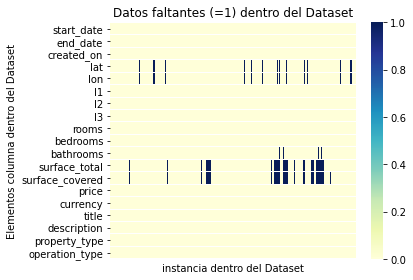

In [8]:
#graficamente podemos ver donde estan los datos faltantes dentro del Datasset
dat=properati_df.isnull()
heat = sns.heatmap(dat.T, cmap = "YlGnBu", xticklabels = False)
plt.title("Datos faltantes (=1) dentro del Dataset")
plt.xlabel("instancia dentro del Dataset")
plt.ylabel("Elementos columna dentro del Dataset")
plt.tight_layout()

#### Conclusion:
Segun los datos obtenidos y el grafico realizado, tenemos datos faltantes en algunas variables del data set. 

En lat y lon representan casi un 7% de los datos (alrrededor de 9900 datos). 

En la variable bathrooms existe un 4% (5927 datos).

En surface_total cerca de un 14% (20527 datos) y en surface_covered casi un 15% (21614 datos).

### Analisis de las primeras 5 instancias del dataset.

In [9]:
properati_df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


### Cuantas propiedades hay de cada tipo?

In [10]:
properati_df.property_type.value_counts()

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

### Sobre que tipo de propiedades trabajaremos?

Es importante destacar de acuerdo a los datos obtenidos, que hay una gran cantidad de departamentos, casas y PH en nuestro dataset. Esas seran las propiedades que se seleccionaran para el trabajo a realizar.

###### .

### Cuantas propiedades pertenecen a cada zona?

In [11]:
properati_df.l2.value_counts()

Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64

* Podemos observar de acuerdo a los datos obtenidos, que hay una gran concentracion de propiedades a la venta en Capital Federal

##### .

### ¿Cómo es la distribución de cada variable? 

In [12]:
print(properati_df.dtypes)

start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
l1                  object
l2                  object
l3                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
title               object
description         object
property_type       object
operation_type      object
dtype: object


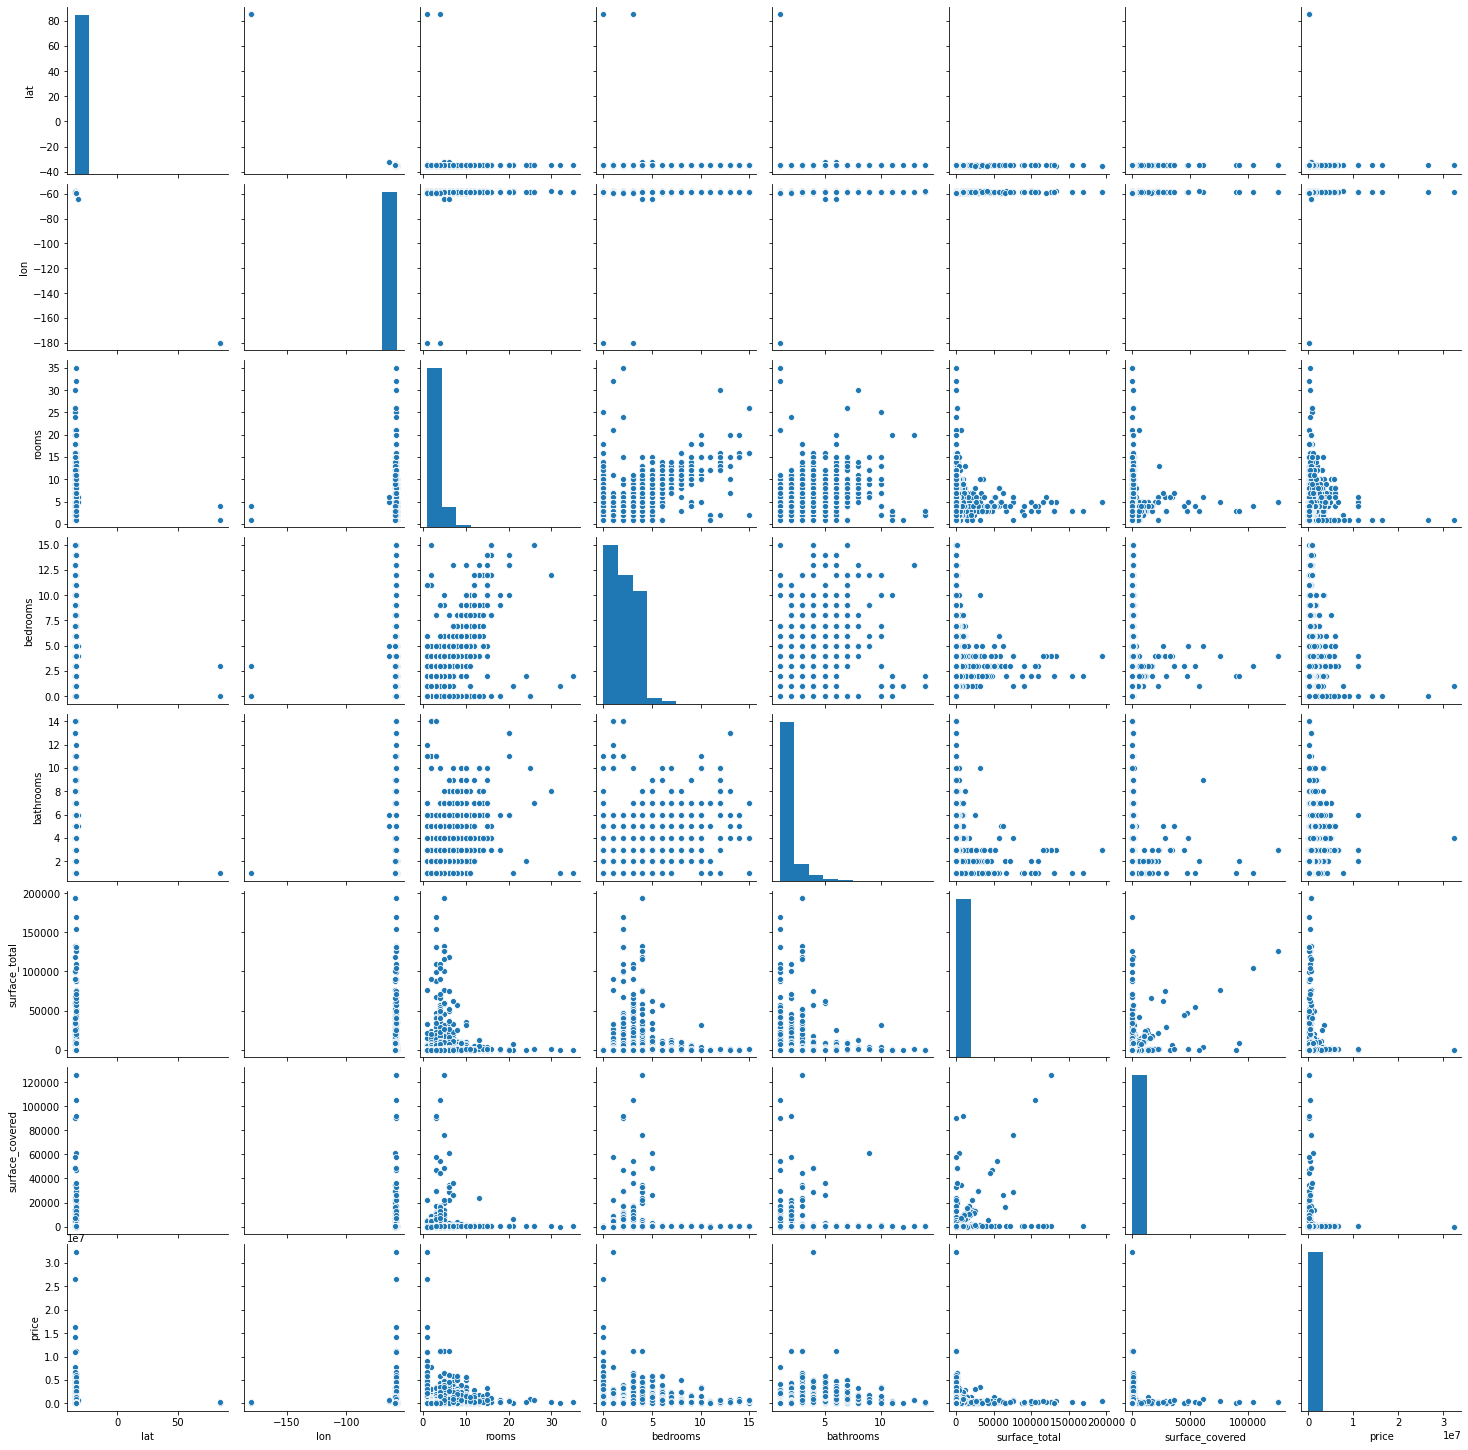

In [13]:
# Haremos un grafico que sea general para todas las variables y ver cuales de ellas, puedan tener algun tipo de relacion,
sns.pairplot(properati_df)

### Conclusion:
Al parecer, hay una realcion del precio con rooms, bedrooms, bathrooms y surface_total. De todas maneras la existencia de algunos valores atipicos dificultan el analisis.

De acuerdo a los resultados, seria conveniente trabajar con los departamentos, P.H y casas de Capital Federal. Tenemos un buen porcentajes de muestras con esas caracterisricas.

###### .

### Limpieza del dataset.

In [14]:
# Eliminamos los datos faltantes...
properati_data = properati_df.dropna()
properati_data.isnull().sum()

start_date         0
end_date           0
created_on         0
lat                0
lon                0
l1                 0
l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
currency           0
title              0
description        0
property_type      0
operation_type     0
dtype: int64

Podemos observar que ya no hay ningun dato faltante en las columnas del Dataset.

In [15]:
properati_data

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,Venta
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,Venta
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,Venta
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Departamento,Venta


Al realizar una limpieza de los datos faltantes an algunas de las columnas y eliminando la fila donde se encontraba dicho valor, nuestro dataset sigue compuesto por 19 columnas, pero ahora tenemos 114488 filas. Estimo que es necesario eliminarlos ya que seguimos teniendo un gran volumen de datos para seguir trabajando.

##### .

#### Cuales son los tipos de propiedades que predominan en nuestro dataset?

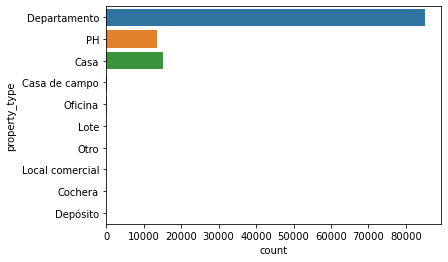

In [16]:
 #grafico
sns.countplot(data=properati_data, y = "property_type")

El grafico de barras anterior nos muestra que la mayoria de las propiedades que estan a la venta son Departamentos (mas de 800000), tambien hay una gran cantidad de casas(alrrededor de 170000) y de P.H (cerca de 12000).

#### Concentracion de propiedades que hay por barrio.

In [17]:
properati_data.l3.value_counts()

Palermo             11211
Almagro              6655
Tigre                6069
Villa Crespo         5835
Caballito            5562
                    ...  
Presidente Perón       67
Villa Soldati          65
Villa Riachuelo        33
Marcos Paz             21
Catalinas               5
Name: l3, Length: 89, dtype: int64

#### Conclusion
El barrio de palermo es el lugar donde se encuentra la mayor concentracion de propiedades a la venta (11211), luego siguen Almagro (6655) y Tigre (6069)

###### .

#### Grafico con la cantidad de propiedades que tienen a la venta cada zona y cada barrio.

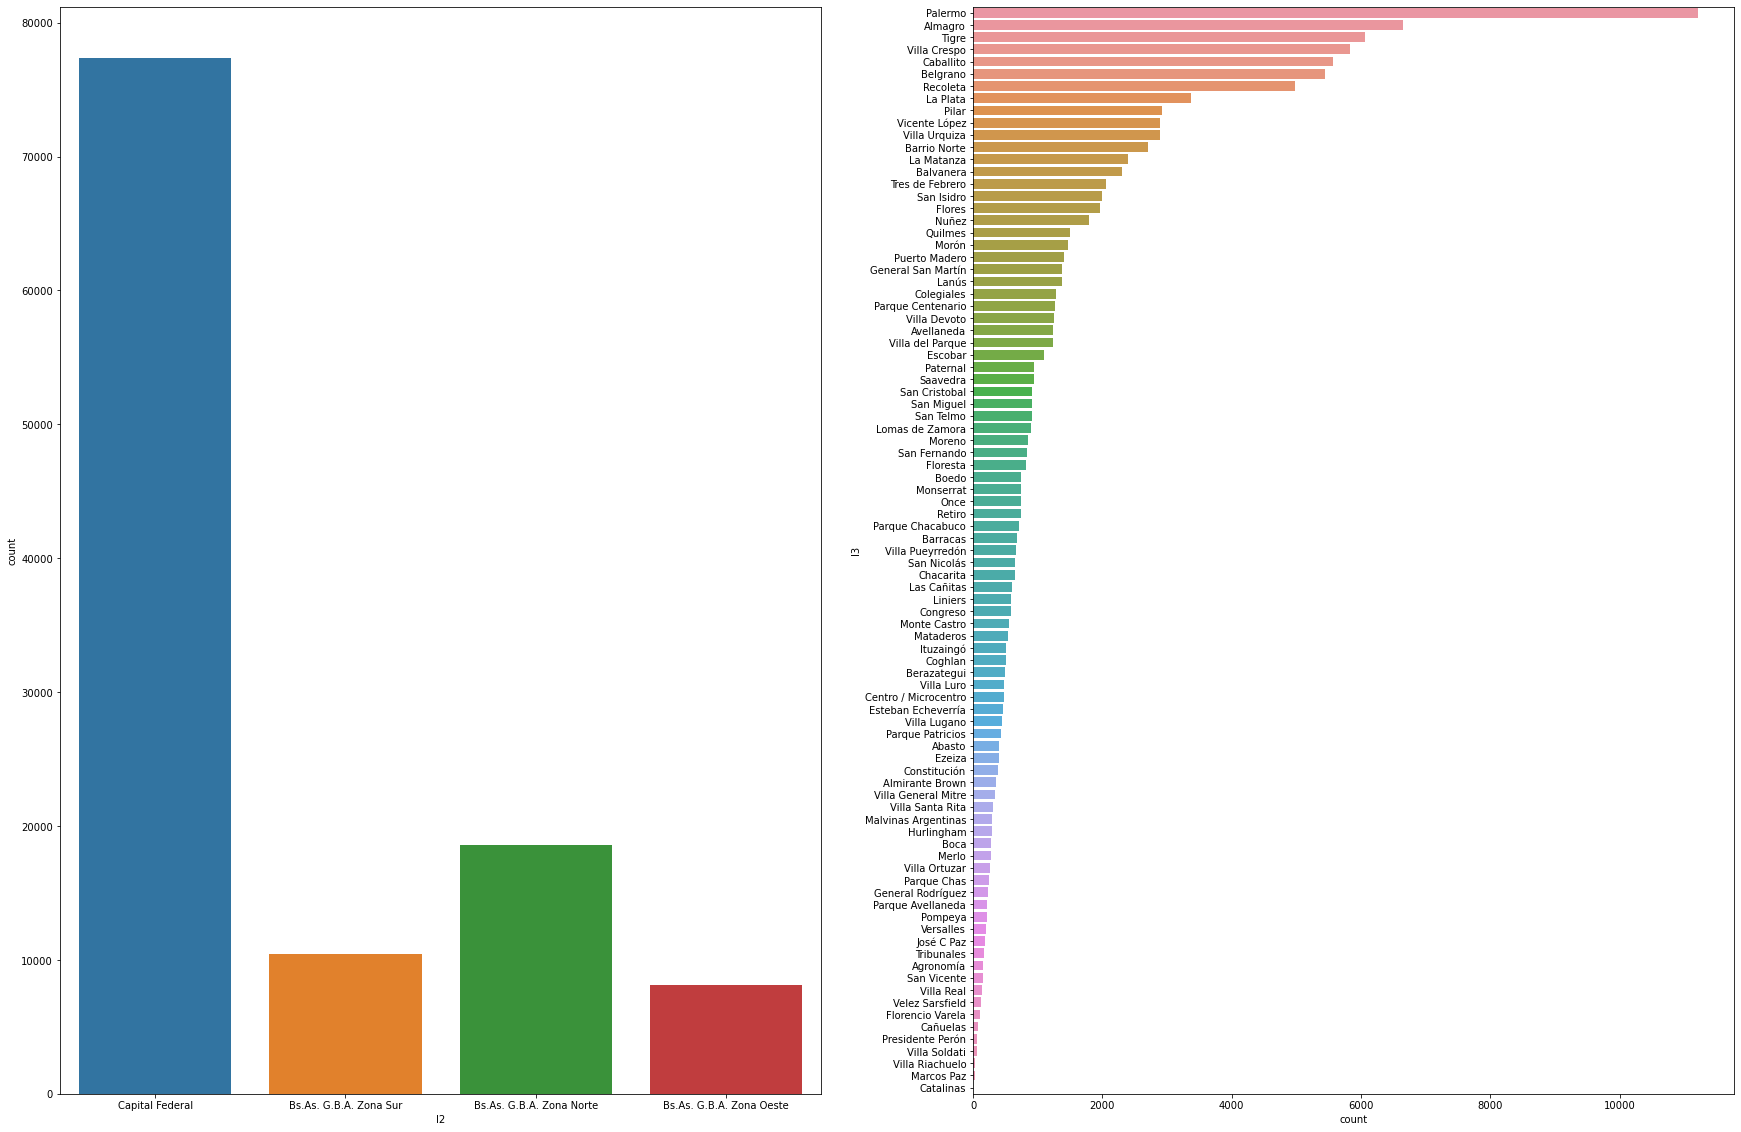

In [18]:
plt.figure(figsize = (30,20))
plt.subplot(1,2,1)
sns.countplot(data= properati_data,x = "l2")

plt.subplot(1,2,2)
sns.countplot(data=properati_data, y="l3", order = properati_data['l3'].value_counts().index)
#sns.countplot(data = properati_data, y = "l3")

De acuerdo al analisis hecho hasta ahora, las propiedades seran PH, Casas y Departamentos que sean solamente de Capital Federal (son el tipo de propiedades que mas tenemos en nuestro Dataset). 

Los datos que nos proporcionaran room, bedrooms y bathroom pienso que son fundamentales ya que son parte de las caracteristicas de la propiedad. Por ultimo otos de los datos que ayudaran seran surface_total y surface_covered, estos datos al igual que los anteriores hacen parte de las caracteristicas de la propiedad, mas especificamente a su tamaño.

Tanto el tipo de propiedad, la zona y las caracteristicas nombradas, seran necesarias para determinar el valor de la propiedad que sea necesario.

#### Seleccion de las propiedades y zona que nos vamos a centrar en trabjar. Luego se realizara la extraccion de las columnas que no van a ser utiles. 

In [19]:
#seleccionamos las propiedades casa,departamento y PH ubicadas en Capital Fedderal.
data_propiedades = properati_df[properati_df.property_type.isin(["Departamento","Casa","PH"])]
propiedades_filtered = data_propiedades[data_propiedades["l2"] == "Capital Federal"]

propiedades_filtered

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146554,2019-07-31,2019-08-14,2019-07-31,-34.585355,-58.427194,Argentina,Capital Federal,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,USD,Soler 4900 - PH 4 Ambientes 100% Reciclado- Pa...,Espectacular Ph 4 Ambientes de excelente calid...,PH,Venta
146555,2019-07-31,2019-08-14,2019-07-31,-34.585355,-58.427194,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,USD,PH Reciclado a nuevo en pleno Palermo Hollywood!,Espectacular Ph 3 Ambientes de excelente calid...,PH,Venta
146556,2019-07-31,2020-01-17,2019-07-31,-34.584134,-58.436389,Argentina,Capital Federal,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,USD,Hermoso PH reciclado - 4 ambientes + Pileta + ...,"Hermoso PH reciclado en Palermo, 143 m2 cubier...",PH,Venta
146557,2019-07-31,2019-08-23,2019-07-31,-34.583995,-58.417645,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,145.0,145.0,420000.0,USD,Venta. Departamento. 3 Ambientes. 145m². Ampli...,CARACTERÍSTICAS- Ambientes: 3.- Superficie tot...,Departamento,Venta


### Checkpoint: deberías tener un dataset con 91485 instacias, 19 columnas.


In [20]:
# Eliminamos las columnas que no vamos a utilizar
propiedades_filtered= propiedades_filtered.drop(["title","description","operation_type","currency","start_date","end_date","created_on","lat","lon","l1"],axis = 1)
propiedades_filtered

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...,...,...
146554,Capital Federal,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,Capital Federal,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,PH
146556,Capital Federal,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,PH
146557,Capital Federal,Palermo,3.0,2.0,2.0,145.0,145.0,420000.0,Departamento


### El Dataset con el que vamos a trabajar ahora tiene una estructura de 9 columnas y 91485 filas.

In [21]:
# Chequeamos con las primeras 5 filas, que los datos sean correctos respectivamente a sus columnas.
propiedades_filtered.head()

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH


### Datos estadisiticos basicos de casas, departamentos y ph en Capital Federal.

In [22]:
propiedades_filtered.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


### Conclusion: 
Luego de realizar un primer filtrado para tomar los datos con lo que vamos a trabajar y en base a datos estadisticos, podemos afirmar que existen datos faltantes en bathrooms, surface_total y surface_covered. 

Tanto por el valor minimo de rooms como el de bedrooms podemos decir que hay monoambientes.

En desvio en surface_covered y en surface_total es mayor que la media, esto nos da una idea de que existen algunas propiedades que tienen una superficie mucho mas grande que la mayoria. Seria apripiado saber la cantidad de propiedades que ocasionan esto y si realmente son relevantes para que sean parte de nuestro Dataset.

### Existen datos faltantes en el dataset con el que vamos a trabajar?

In [23]:
propiedades_filtered.isnull().sum()

l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms          2171
surface_total      8917
surface_covered    9235
price                 0
property_type         0
dtype: int64

In [24]:
# porcentaje de valores faltantes por columna.
propiedades_filtered.isna().sum()/propiedades_filtered.shape[0]*100

l2                  0.000000
l3                  0.000000
rooms               0.000000
bedrooms            0.000000
bathrooms           2.373067
surface_total       9.746953
surface_covered    10.094551
price               0.000000
property_type       0.000000
dtype: float64

Despues de hacer el Describe, hay datos faltantes en algunas columnas. En la columna de bathrooms, existe un 2.37% de valores faltantes (2171 datos), en surface_total casi un 10% (8917 datos), y en surface_covered un 10%(9235 datos). Si bien es un numero elevado la cantidad de datos faltantes en surface_total y surface_covered, eliminar esos datos y los de bathrooms no seran significativos ni nos van a impedir seguir con el trabajo, ya que vamos a seguir disponiendo de una cantidad grande de datos.

In [25]:
# Eliminamos los datos faltantes.
properati_filtered = propiedades_filtered.dropna()
properati_filtered.isnull().sum()

l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

### Datos estadisiticos basicos de casas, departamentos y ph en Capital Federal.

In [26]:
properati_filtered.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,81210.000000,81210.000000,81210.000000,81210.000000,81210.00000,8.121000e+04
mean,3.010590,2.002598,1.554747,112.913053,95.12400,2.660296e+05
std,1.310903,1.050665,0.855211,988.490542,783.06276,3.340422e+05
min,1.000000,0.000000,1.000000,10.000000,1.00000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.00000,1.250000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.00000,1.800000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.00000,2.800000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.00000,3.243423e+07


Luego de eliminar las filas donde exista algun dato faltante y de chequear datos estadisticos basicos, podemos notar que haber eliminado esas filas, seguimos teniendo resultados similares al Dataset anterior.

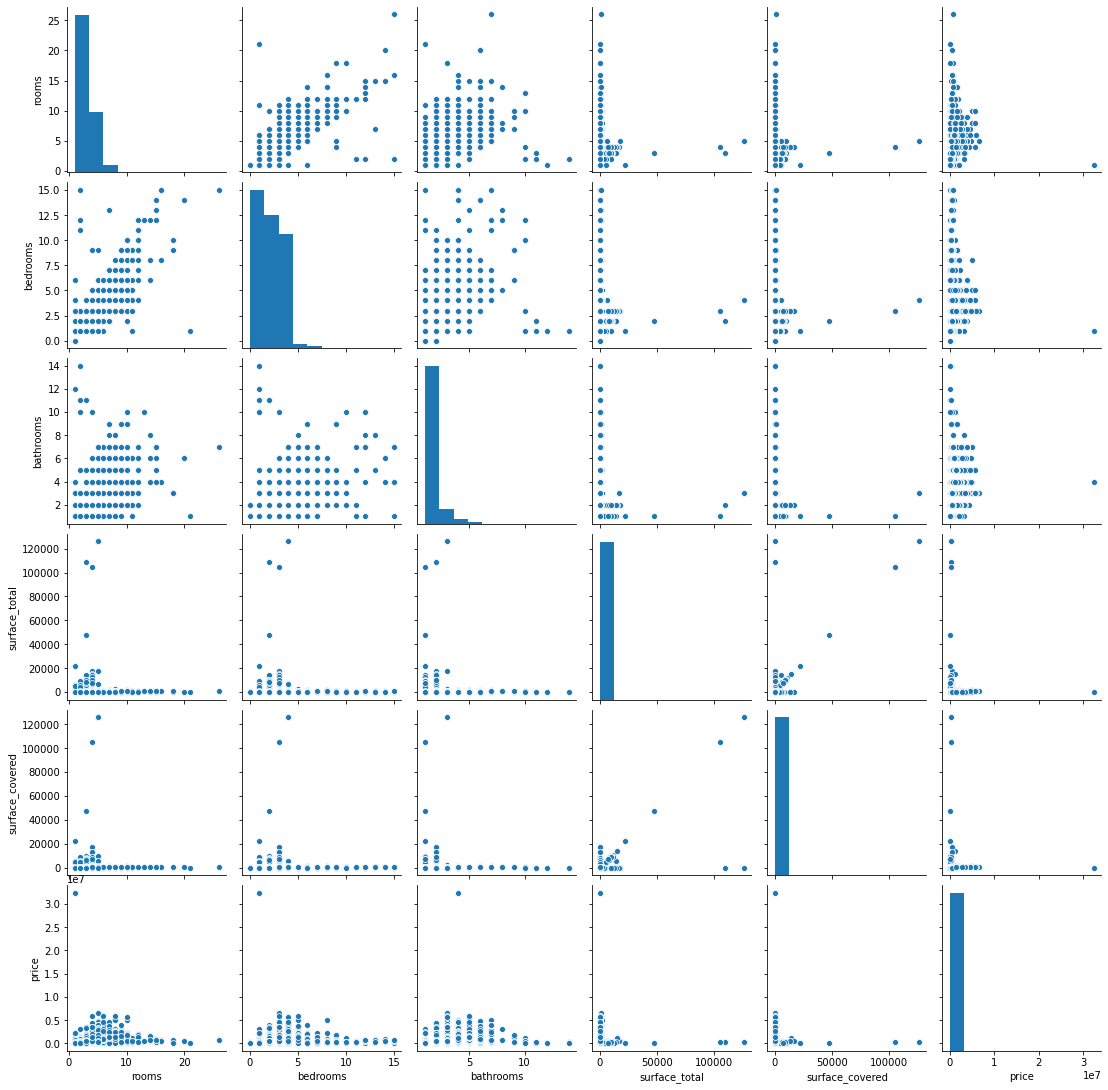

In [27]:
# Se realizara un grafico del dataset filtrado con las propiedades, zona, variables seleccionadas y sin valores faltantes.
# La idea es visualizar si hay existencia de outslider en algunas variables, en todo caso que existan verificar la cantidad de ellas
# Tambien verificar si a simple viste existe una relacion entre algunas de las variables.
sns.pairplot(properati_filtered)

#### Conclusion: 
Algunos valores atipicos dificultan el analisis de los graficos, aunque son muy pocos valores y lo mejor seria eliminarlos para que no interfieran en nuestro analisis. Como antes dijimos, al parecer rooms, bedrooms y bathrooms se relacionan con el precio de las propiedades.

### Outslide

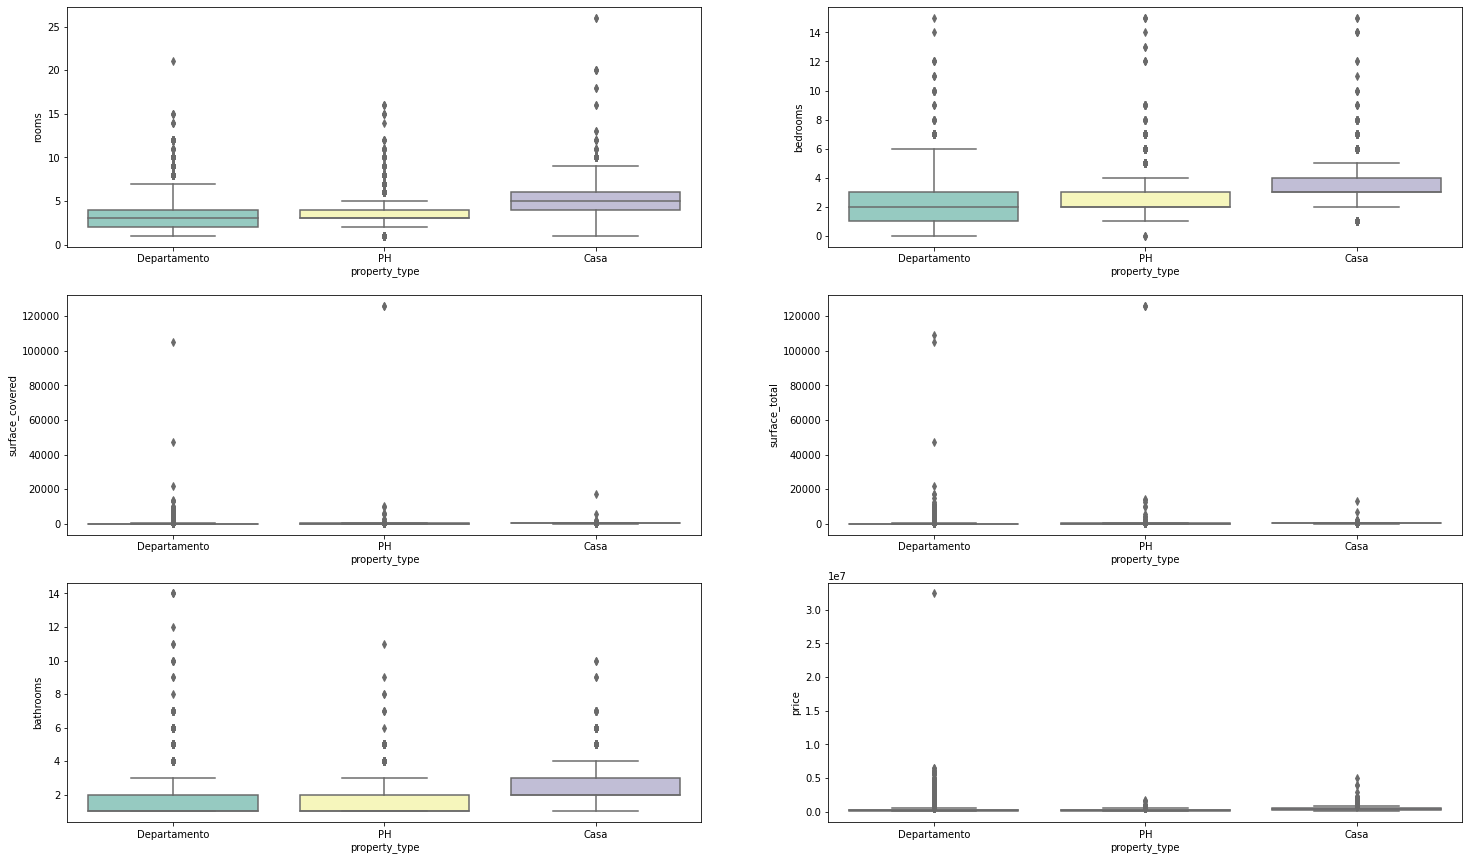

In [28]:
# Se graficara a traves de Boxplot todas datos atipicos que tengan las variables. Tamvien su media, mediana y cuartiles.
fig, axs = plt.subplots(nrows=3,ncols=2,figsize=(25,15))
sns.boxplot(x="property_type", y="rooms",data=properati_filtered, palette="Set3", ax=axs[0][0])
sns.boxplot(x="property_type", y="bedrooms",data=properati_filtered, palette="Set3", ax=axs[0][1])
sns.boxplot(x="property_type", y="surface_covered",data=properati_filtered, palette="Set3", ax=axs[1][0])
sns.boxplot(x="property_type", y="surface_total",data=properati_filtered, palette="Set3", ax=axs[1][1])
sns.boxplot(x="property_type", y="bathrooms",data=properati_filtered, palette="Set3", ax=axs[2][0])
sns.boxplot(x="property_type", y="price",data=properati_filtered, palette="Set3", ax=axs[2][1])

Que el desvio sae mayor que la media, como se demostro en el ultimo analisis estadistico, puede ser basicamente porque algunas pocas propiedades tienen unas cantidades de baños, habitaciones ,m2 , incluso precio, mucho mayor que el la mayoria de las propiedades.

#### - Son reelevantes esas propiedades que se diferencian en gran cantidad de la mayoria?

In [29]:
# Ordenamos los precios en orden descendentes para poder visualizar los outslider, es decir visualizar algunas caracteristicas de las casas mas costozas.
properati_filtered.sort_values(by='price', ascending=False)

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
76894,Capital Federal,Palermo,1.0,1.0,4.0,43.0,43.0,32434232.0,Departamento
94655,Capital Federal,Puerto Madero,5.0,3.0,3.0,771.0,611.0,6500000.0,Departamento
97166,Capital Federal,Puerto Madero,5.0,3.0,3.0,771.0,611.0,6500000.0,Departamento
39938,Capital Federal,Recoleta,6.0,3.0,3.0,600.0,600.0,6000000.0,Departamento
35814,Capital Federal,Recoleta,6.0,3.0,3.0,600.0,600.0,6000000.0,Departamento
...,...,...,...,...,...,...,...,...,...
10799,Capital Federal,Parque Chacabuco,1.0,1.0,1.0,31.0,31.0,7500.0,Departamento
102589,Capital Federal,Recoleta,3.0,2.0,2.0,340.0,200.0,6000.0,Departamento
117012,Capital Federal,Puerto Madero,3.0,2.0,3.0,275.0,220.0,6000.0,Departamento
62989,Capital Federal,Palermo,5.0,4.0,4.0,340.0,320.0,6000.0,Departamento


### Conclusion: 
Solo una casa se diferencia en gran medida de las demas, estimo que es la causa de que el desvio sea mayor que la media.

#### Seleccionaremos para nuestro analisis aquellas propiedades que :

Tengan un precio menor a 700000 usd

-Tengan una superficie cubierta menor a 450

-Tenga una superficie total menor a 600

-Tenga menos de 10 ambientes.

-Tenga entre 1 y 7 baños

-Tenga entre 1 y 7 habitaciones

### Price

In [30]:
# Propiedades que tengan un precio menor a 700000 usd.
properati_price = properati_filtered.drop(properati_filtered[(properati_filtered["price"] > 700000)].index)

In [31]:
properati_price

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...,...,...
146553,Capital Federal,Palermo,4.0,3.0,2.0,106.0,100.0,620000.0,Departamento
146554,Capital Federal,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,Capital Federal,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,PH
146556,Capital Federal,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,PH


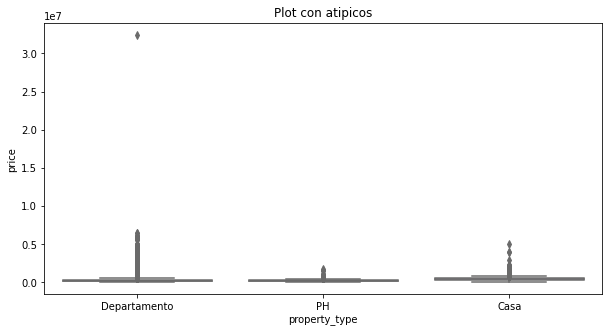

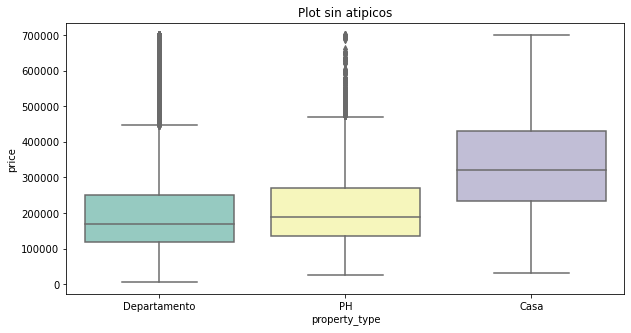

In [32]:
plt.subplots(ncols=0,figsize=(10,5))
ax1 = sns.boxplot(x="property_type", y="price",data=properati_filtered, palette="Set3")

plt.subplots(ncols=1,figsize=(10,5))
ax2 = sns.boxplot(x="property_type", y="price",data=properati_price,palette="Set3")

ax1.title.set_text('Plot con atipicos')
ax2.title.set_text('Plot sin atipicos')

#### Conclusion: 
La mitad de los departamentos tienen un valor menor a los 180000 usd, en el caso de los P.H el 50% de ellos tienen un valor cercano a los 200000 usd. En las Casas se puede observar un grafico con una distribucion normar donde el 50% de las casas tienen un valor de  aproximado de 320000 usd.

Observando los graficos de Departamentos y P.H, se puede apreciar una distribucion con sesgo positivo, esto significa que en el caso de los departamentos,el 75% se ellos tienen un valor menor a los 250000 usd, en el caso de los P.H el 75% de ellos tienen un valor menor a 260000 usd.

### Surface_total

In [33]:
# Ordenamos surface_total en orden descendientes para poder visualizar los outslider
properati_filtered.sort_values(by='surface_total', ascending=False)

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
13243,Capital Federal,Caballito,5.0,4.0,3.0,126062.0,126062.0,220000.0,PH
90235,Capital Federal,Caballito,5.0,4.0,3.0,126062.0,126062.0,215000.0,PH
35231,Capital Federal,Caballito,5.0,4.0,3.0,126062.0,126.0,240000.0,PH
36331,Capital Federal,Villa Crespo,3.0,2.0,2.0,108960.0,78.0,290000.0,Departamento
102042,Capital Federal,Barrio Norte,4.0,3.0,1.0,104890.0,104890.0,265000.0,Departamento
...,...,...,...,...,...,...,...,...,...
57085,Capital Federal,Parque Chacabuco,2.0,1.0,1.0,11.0,73.0,161900.0,Departamento
109366,Capital Federal,Parque Centenario,3.0,2.0,2.0,11.0,63.0,239000.0,Departamento
48635,Capital Federal,Palermo,3.0,1.0,1.0,11.0,60.0,158000.0,PH
132438,Capital Federal,Belgrano,3.0,2.0,1.0,10.0,78.0,160000.0,Departamento


In [34]:
# propiedades que tengan una superficie total menor a 600.
properati_total = properati_filtered.drop(properati_filtered[(properati_filtered["surface_total"] > 600.0)].index)

In [35]:
properati_total

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...,...,...
146554,Capital Federal,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,Capital Federal,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,PH
146556,Capital Federal,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,PH
146557,Capital Federal,Palermo,3.0,2.0,2.0,145.0,145.0,420000.0,Departamento


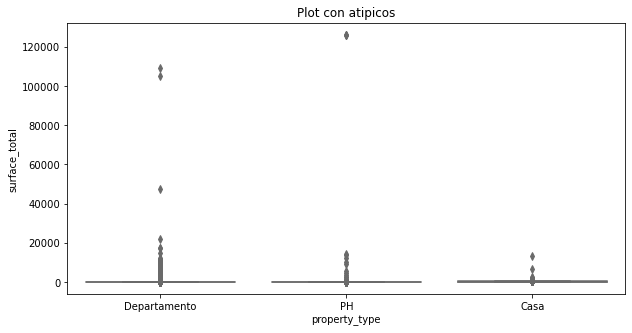

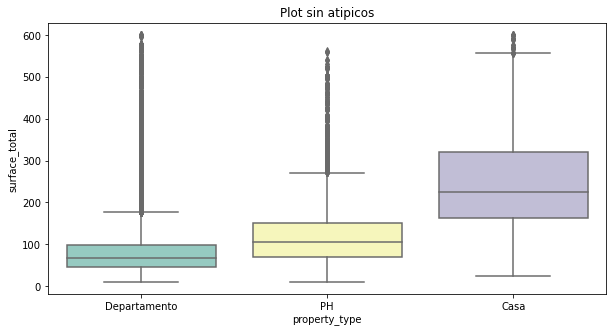

In [36]:
plt.subplots(ncols=0,figsize=(10,5))
ax1 = sns.boxplot(x="property_type", y="surface_total",data=properati_filtered, palette="Set3")

plt.subplots(ncols=1,figsize=(10,5))
ax2 =sns.boxplot(x="property_type", y="surface_total",data=properati_total, palette="Set3")

ax1.title.set_text('Plot con atipicos')
ax2.title.set_text('Plot sin atipicos')

#### Conclusion:

En el grafico correspondiente a los Departamentos, podemos observar que el promedio de la superficie total de ellos tienen 60 m2, sin embargo el 75% de los departamentos tienen una superficie total menor a 100 m2, los datos de esta variable se encuentra balanceadas, aqeuellos departamentos que tengan una superficie total mayor a 100 m2 seran considerados como atipicos.

En el caso de los P.H, la mitad tienen una superficie total que va de los 60 m2 a los 150 m2 , observandose que los datos se encuentran perfectamente balanceados y que aquellos P.H con mas de 150 m2 seran considerados como valores raros.

Por ultimo, en el grafico boxplot correspondiente a las casas, como era de esperar, se puede observar que la mitad de las casas tiene una superficie total mucho mayor que a las otras dos variables, teniendo de 180 m2 a 300m2. Los datos encuentran desbalanceados y que la mediana es mayor que el promedio, mostrando en el grafico un sesgo negativo. El 75 de las casas tiene una superficie total memor a 300 m2. Aquellas casas que tengan una superficie cubierta mayor a 550 m2 sera comsiderada como un atipico.

### Surface_covered

In [37]:
#ordenamos surface_covered en orden descendientes para poder visualizar los outslider
properati_filtered.sort_values(by='surface_covered', ascending=False)

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
13243,Capital Federal,Caballito,5.0,4.0,3.0,126062.0,126062.0,220000.0,PH
90235,Capital Federal,Caballito,5.0,4.0,3.0,126062.0,126062.0,215000.0,PH
102042,Capital Federal,Barrio Norte,4.0,3.0,1.0,104890.0,104890.0,265000.0,Departamento
42655,Capital Federal,Almagro,3.0,2.0,1.0,47360.0,47360.0,116000.0,Departamento
118389,Capital Federal,Congreso,1.0,1.0,1.0,21920.0,21920.0,50000.0,Departamento
...,...,...,...,...,...,...,...,...,...
57279,Capital Federal,Caballito,4.0,3.0,2.0,111.0,2.0,200000.0,Departamento
106177,Capital Federal,Villa Luro,1.0,1.0,1.0,27.0,2.0,67000.0,Departamento
26523,Capital Federal,Palermo,4.0,3.0,2.0,125.0,1.0,800000.0,Departamento
131428,Capital Federal,Flores,4.0,3.0,1.0,229.0,1.0,210000.0,PH


In [38]:
# Propiedades que tengan una superficie cubierta menor a 450 y mayor a 20m2.
properati_covered1 = properati_filtered.drop(properati_filtered[(properati_filtered["surface_covered"] > 450 )].index)
properati_covered2 = properati_covered1.drop(properati_covered1[(properati_covered1["surface_covered"] < 20)].index)

In [39]:
properati_covered2

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...,...,...
146554,Capital Federal,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,Capital Federal,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,PH
146556,Capital Federal,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,PH
146557,Capital Federal,Palermo,3.0,2.0,2.0,145.0,145.0,420000.0,Departamento


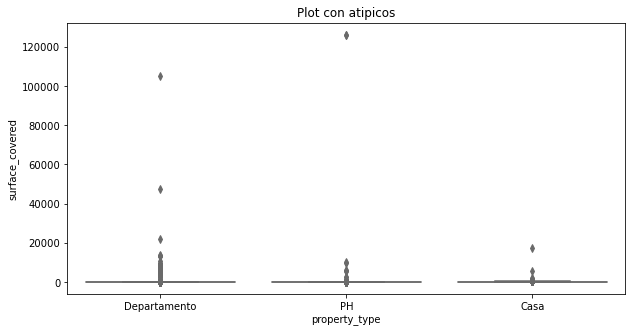

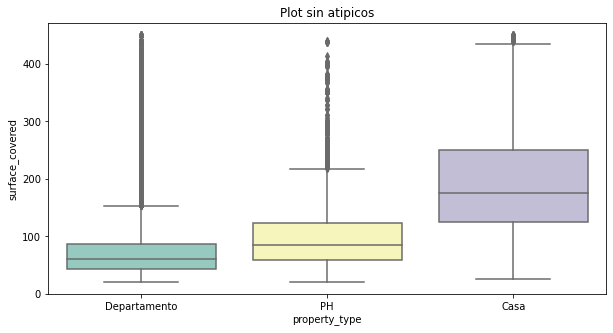

In [40]:
plt.subplots(ncols=0,figsize=(10,5))
ax1 = sns.boxplot(x="property_type", y="surface_covered",data=properati_filtered, palette="Set3")

plt.subplots(ncols=1,figsize=(10,5))
ax2 =sns.boxplot(x="property_type", y="surface_covered",data=properati_covered2, palette="Set3")

ax1.title.set_text('Plot con atipicos')
ax2.title.set_text('Plot sin atipicos')

#### Conclusion:

-Departamentos: exactamente la mitad de los departamentos con lo que estamos trabajando tienen una superficie cubierta que va desde los 50 m2 a los 90 m2, sin embargo existe un desbalanceo positivo de ellos. Tambien podemos decir que el 75% de los departaamentos tienen una superficie cubierta menor a 90 m2, otro 25% de los departamentos van desde los 90 m2 a los 160 m2. AqueLlos departamentos que tengan una superficie cubierta mayor a 160 m2 sera considerada como un valor atipico.

-P.H: segun lo que se puede observar, los datos se esncuentran correctamente balanceados, coincidiendo la mediana con el promedio. El 75 % de los P.H tiene una superficie cubierta menor a los 120 m2, sin embargo la mitad tiene una superficie cubierta que van desde los 60 m2 a los 120 m2, el 25% restante tiene valores cubiertos que van desde los 120 m2 hasta los 225 m2. Aquellos P.H que tengan una superficie cubierta mayor a 225m2 sera considerado como un valor atipico.

-Casa: si bien se puede observar un sesgo positivo, donde el 75% de las casas tiene una superficie cubierta menor a 230 m2. Como era de esperar los valores maximos son mayores que los departamentos y los P.H. Aqeullas casas con una superficie cubierta mayor a 450 m2 sera considerada como un valor atipico.

### Rooms

In [41]:
properati_filtered.sort_values(by='rooms', ascending=False)

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
31583,Capital Federal,Boca,26.0,15.0,7.0,845.0,835.0,750000.0,Casa
111651,Capital Federal,Boca,26.0,15.0,7.0,845.0,835.0,750000.0,Casa
42577,Capital Federal,Recoleta,21.0,1.0,1.0,53.0,45.0,135000.0,Departamento
116672,Capital Federal,Paternal,20.0,14.0,6.0,295.0,466.0,460000.0,Casa
108803,Capital Federal,Paternal,20.0,14.0,6.0,295.0,466.0,460000.0,Casa
...,...,...,...,...,...,...,...,...,...
92478,Capital Federal,San Telmo,1.0,0.0,1.0,20.0,20.0,59000.0,Departamento
121885,Capital Federal,Abasto,1.0,1.0,1.0,31.0,29.0,120000.0,Departamento
20561,Capital Federal,Parque Patricios,1.0,1.0,1.0,38.0,35.0,72000.0,Departamento
121866,Capital Federal,Once,1.0,1.0,1.0,38.0,35.0,114000.0,Departamento


In [42]:
# Propiedades que tengan menos de 10 ambientes.
properati_rooms = properati_filtered.drop(properati_filtered[(properati_filtered["rooms"] > 10)].index)

In [43]:
properati_rooms

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...,...,...
146554,Capital Federal,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,Capital Federal,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,PH
146556,Capital Federal,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,PH
146557,Capital Federal,Palermo,3.0,2.0,2.0,145.0,145.0,420000.0,Departamento


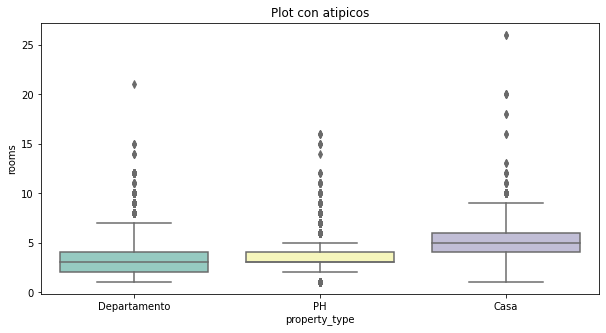

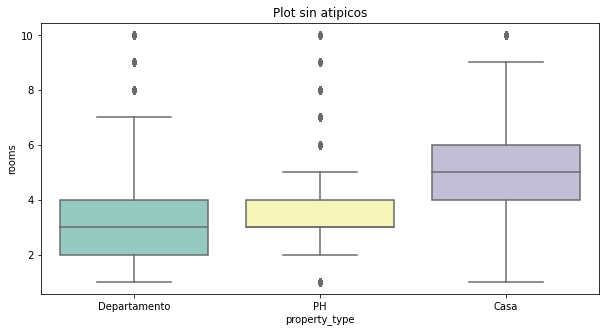

In [44]:
plt.subplots(ncols=0,figsize=(10,5))
ax1 = sns.boxplot(x="property_type", y="rooms",data=properati_filtered, palette="Set3")

plt.subplots(ncols=1,figsize=(10,5))
ax2 =sns.boxplot(x="property_type", y="rooms",data=properati_rooms, palette="Set3")

ax1.title.set_text('Plot con atipicos')
ax2.title.set_text('Plot sin atipicos')

### Conclusion:

Los departamentos tienen una distribcuion normal de los datos, se puede observar que el promedio de ambientes es de 3 y que el 75% de los ellos tienen 4 o menos ambientes. Aquellos que tenagan mas de 7 ambientes seran considerado como atipicos.

En cuanto a los P.H, no se observa la posicion de a mediana pero podemos definir que el rango intercuatilico es igual a 1. Si bien el 75 de los P.H tienen menos de 5 ambientes, todos aquellos P.H que tengan mas de 5 ambientes seran considerados como atipicos.

Los datos de las casas se encuentran perfectamente balanceados, podemos definir que el promedio de ambientes en las casas es de 5, sin embargo el 75% de las casas con las que estamos trabajando tienen menos de 6 ambientes. Cabe destacar que todas aquellas casas que tengan mas de 9 ambientes seran consideradas como un atipico.

### Bedrooms.

In [45]:
properati_filtered.sort_values(by='bedrooms', ascending=False)

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
69101,Capital Federal,Belgrano,16.0,15.0,4.0,476.0,297.0,500000.0,PH
31583,Capital Federal,Boca,26.0,15.0,7.0,845.0,835.0,750000.0,Casa
34580,Capital Federal,Belgrano,16.0,15.0,4.0,476.0,297.0,500000.0,PH
111651,Capital Federal,Boca,26.0,15.0,7.0,845.0,835.0,750000.0,Casa
8843,Capital Federal,Boca,2.0,15.0,1.0,47.0,44.0,100000.0,Departamento
...,...,...,...,...,...,...,...,...,...
62518,Capital Federal,Palermo,1.0,0.0,1.0,55.0,45.0,157000.0,Departamento
62519,Capital Federal,Palermo,1.0,0.0,1.0,38.0,34.0,134000.0,Departamento
62521,Capital Federal,Belgrano,1.0,0.0,1.0,30.0,27.0,109000.0,Departamento
46260,Capital Federal,Villa Urquiza,1.0,0.0,1.0,37.0,33.0,105000.0,Departamento


In [46]:
# Propiedades que temgan menos de 7 habitaciones.
properati_bedrooms = properati_filtered.drop(properati_filtered[(properati_filtered["bedrooms"] > 7.0 )].index)

In [47]:
properati_bedrooms

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...,...,...
146554,Capital Federal,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,Capital Federal,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,PH
146556,Capital Federal,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,PH
146557,Capital Federal,Palermo,3.0,2.0,2.0,145.0,145.0,420000.0,Departamento


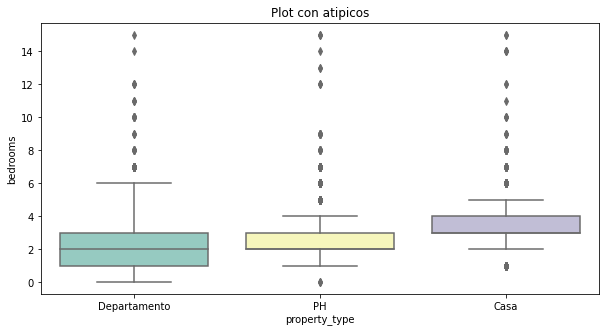

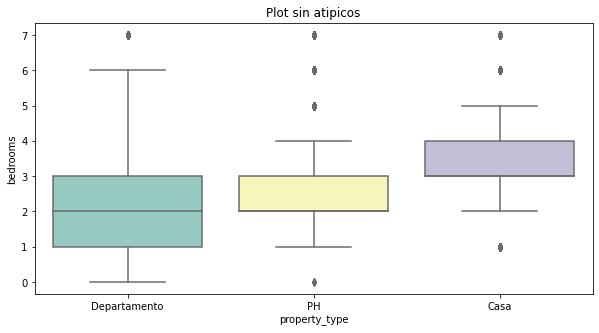

In [48]:

plt.subplots(ncols=0,figsize=(10,5))
ax1 = sns.boxplot(x="property_type", y="bedrooms",data=properati_filtered, palette="Set3")

plt.subplots(ncols=1,figsize=(10,5))
ax2 =sns.boxplot(x="property_type", y="bedrooms",data=properati_bedrooms, palette="Set3")

ax1.title.set_text('Plot con atipicos')
ax2.title.set_text('Plot sin atipicos')

### Conclusion:

Analizando el grafico de departamentos se puede confirmar que los datos se encuentran bien balanceados, el promedio de dormitorios es igual a 2. Si bien algunos tiene valor 0, podemos confirmar que hace referencia a monoambientes. El 75% de ellos tienen 3 o menos dormitorios, sin embargo aquellos departamentos que tengan mas de 6 dormitorios seran considerados como atipicos.

En los P.H no se puede observar la mediana pero podemos decir que el rango intercuartilico es 1. El 75 de los P.H tienen de 3 a 1 dormitorio. Aquellas propiedades de tipo P.H que tengan mas de 4 dormitorios o que no tenga dormitorio, sera considerada como un atipico.

Con respecto al grafico de las casas, podemos decir que al no tener presente la mediana, el valor iqr es igual a 1. Si bien el 75% de las casas tienen 4 o menos dormitorios, aquellas que tengan mas de 5 dormitorios o menos de 2, sera considerada como un atipico.

### Bathrooms.

In [49]:
properati_filtered.sort_values(by='bathrooms', ascending=False)

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
35960,Capital Federal,Palermo,2.0,1.0,14.0,50.0,50.0,225000.0,Departamento
136930,Capital Federal,Recoleta,2.0,1.0,14.0,45.0,45.0,159000.0,Departamento
132709,Capital Federal,Recoleta,2.0,1.0,14.0,45.0,45.0,159000.0,Departamento
53274,Capital Federal,Belgrano,1.0,1.0,12.0,38.0,34.0,140000.0,Departamento
73948,Capital Federal,Palermo,2.0,1.0,11.0,44.0,36.0,149000.0,Departamento
...,...,...,...,...,...,...,...,...,...
76103,Capital Federal,San Telmo,4.0,2.0,1.0,90.0,90.0,120000.0,PH
26341,Capital Federal,Villa Urquiza,4.0,3.0,1.0,60.0,60.0,270000.0,PH
26340,Capital Federal,Villa Urquiza,4.0,3.0,1.0,90.0,90.0,268000.0,PH
76124,Capital Federal,Almagro,4.0,3.0,1.0,72.0,67.0,172000.0,Departamento


In [50]:
# Propiedades que temgan menos de 5 baños.
properati_bathrooms = properati_filtered.drop(properati_filtered[(properati_filtered["bathrooms"] > 5.0 )].index)

In [51]:
properati_bathrooms

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...,...,...
146554,Capital Federal,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,Capital Federal,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,PH
146556,Capital Federal,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,PH
146557,Capital Federal,Palermo,3.0,2.0,2.0,145.0,145.0,420000.0,Departamento


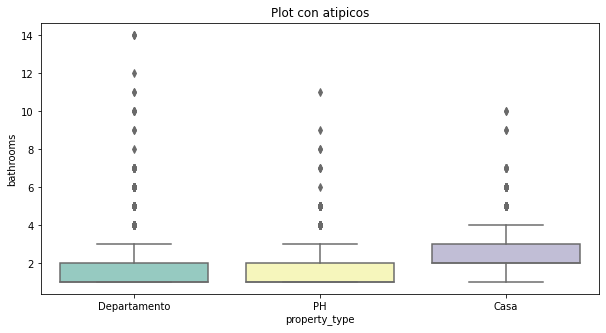

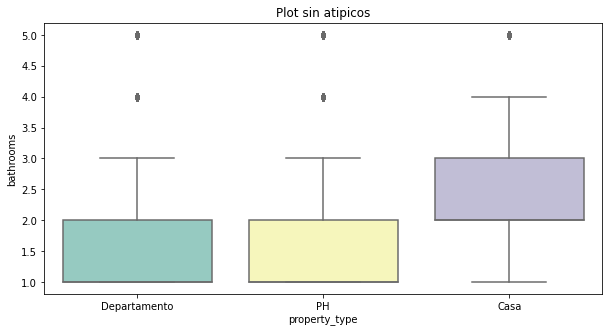

In [52]:
plt.subplots(ncols=0,figsize=(10,5))
ax1 = sns.boxplot(x="property_type", y="bathrooms",data=properati_filtered, palette="Set3")

plt.subplots(ncols=1,figsize=(10,5))
ax2 =sns.boxplot(x="property_type", y="bathrooms",data=properati_bathrooms, palette="Set3")

ax1.title.set_text('Plot con atipicos')
ax2.title.set_text('Plot sin atipicos')

#### Conclusion:
Analizando el grafico de departametos y de P.H, podemos confirmar que el rango intercuartilico de ambos es 1, sin embargo el 75% de los departamentods y de los P.H tiene 2 o menos baños. Aquellos departamentos y P.H con mas de 3 baños sera considerados como atipicos.

En el analisis de las casas obtenemos un iqr igual a 1. A diferencia de las otros dos tipos de propiedades, el 75% tienen 3 o menos casas y aquellas casas que tengan mas de 4 baños sera considerdad como un valor atipico. 

In [53]:
#eliminamos aquellas variables donde la superficie cubierta es mayor que la superficie total.
df_prop =properati_filtered.drop(properati_filtered[(properati_filtered.surface_covered) > (properati_filtered.surface_total)].index)

In [54]:
df_prop

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...,...,...
146554,Capital Federal,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,Capital Federal,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,PH
146556,Capital Federal,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,PH
146557,Capital Federal,Palermo,3.0,2.0,2.0,145.0,145.0,420000.0,Departamento


#### Checkpoint
El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
Una vez filtrado el dataset, puedes utilizar la función pairplot de Seaborn.

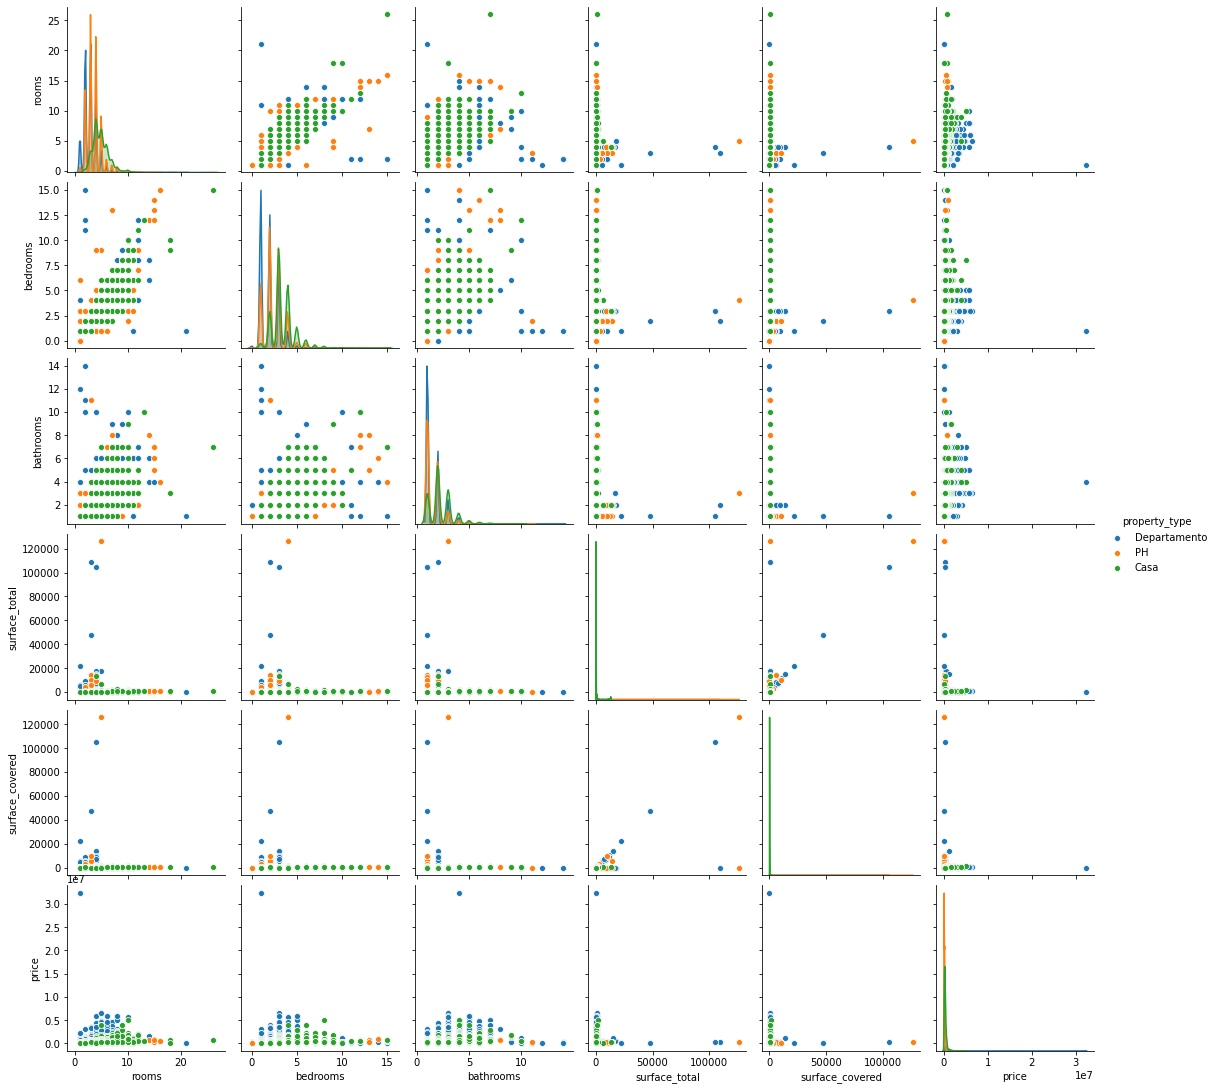

In [55]:
sns.pairplot(df_prop, hue="property_type")

#### Luego de haber eliminado aquellas propiedades donde la superficie cubierta era mayor que que la superficie total, al observar y comparar el precio con las demas variables, se dificulta evaluar si hay algun tipo de correlacion ya que hay atipicos presente.
#### Como se realizo anteriormente con properati_price, se realizara un filtrado eliminando propiedades mayores a 700000 usd, luego se volevera a realizar un pairplot para evaluar si se puede verificar alguna relacion entre el precio y alguna de las otras variables.

In [56]:
properati_price = properati_filtered.drop(properati_filtered[(properati_filtered[ "price"] > 700000)].index)
properati_total = properati_price.drop(properati_price[(properati_price["surface_total"] > 600.0)].index)
properati_covered1 = properati_total.drop(properati_total[(properati_total["surface_covered"] > 450 )].index)
properati_covered2 =properati_covered1.drop(properati_covered1[(properati_covered1["surface_covered"] < 20)].index)
properati_rooms = properati_covered2.drop(properati_covered2[(properati_covered2["rooms"] > 10)].index)
properati_bedrooms = properati_rooms.drop(properati_rooms[(properati_rooms["bedrooms"] > 7.0 )].index)
properati_bathrooms = properati_bedrooms.drop(properati_bedrooms[(properati_bedrooms["bathrooms"] > 5.0 )].index)
properati_fil = properati_bathrooms

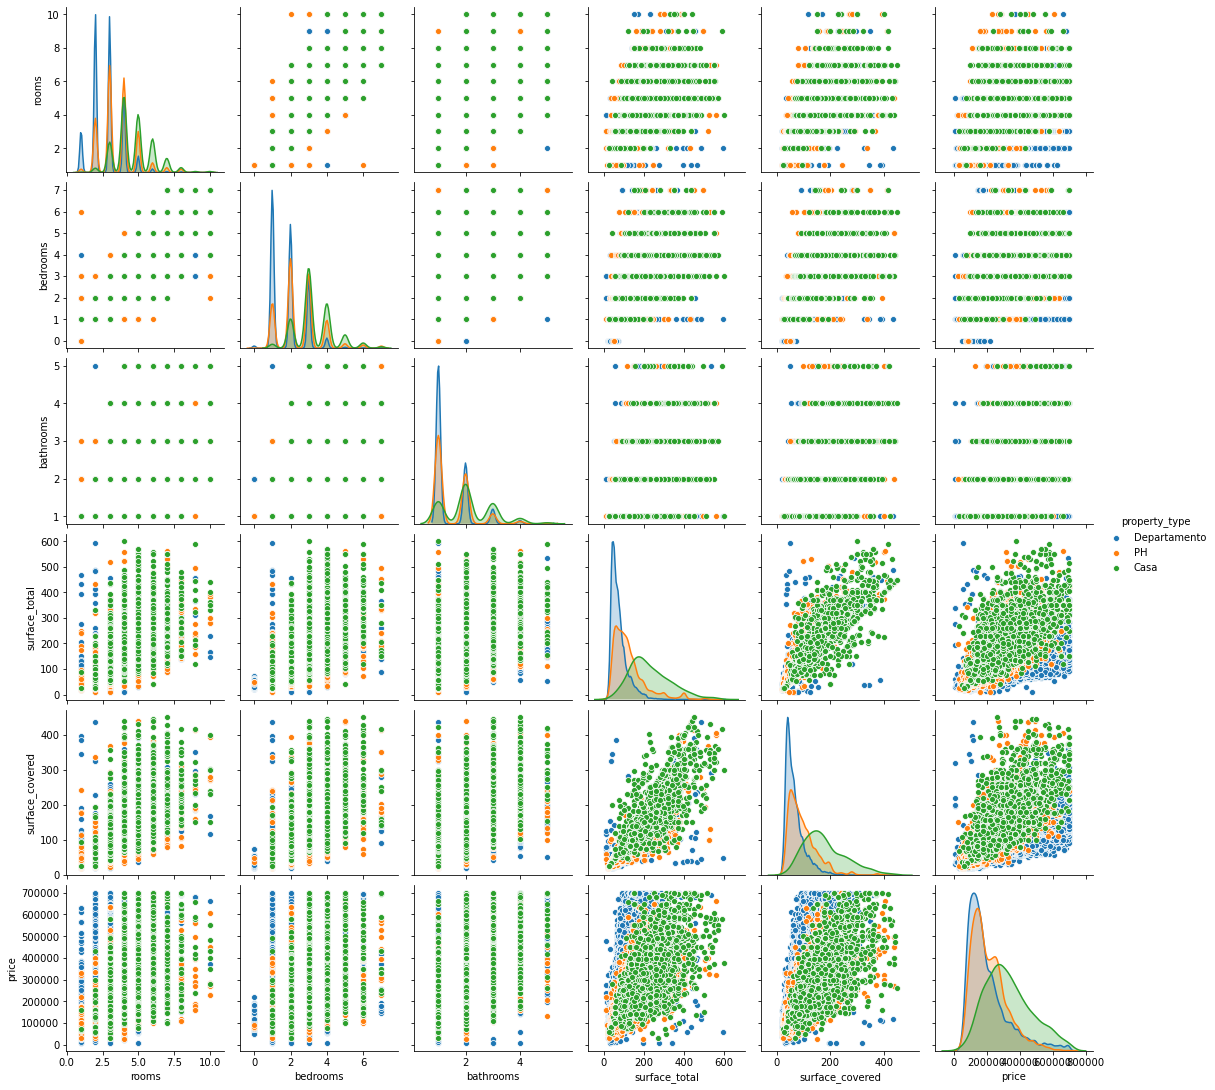

In [57]:
sns.pairplot(properati_fil, hue="property_type")

#### Conclusion:

Luego de haber filtrado todo el dataset sin valores atipicos como fue analizado anteriormente, parece que hay una relacion amplia entre el precio,rooms, bedrooms y bathrooms. En cuanto a superficie total y cubierta la correlacioon al parecer es mucho menor.

Con respecto al tipo de propiedades, la superficie cubierta y la superficie total, parece influir en el precio.

### Estudiamos la correlacion.

In [58]:
properati_fil= df_prop.drop(["l2","l3",],axis = 1)


In [59]:
properati_fil

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...
146554,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,3.0,2.0,2.0,144.0,134.0,480000.0,PH
146556,4.0,2.0,2.0,317.0,143.0,530000.0,PH
146557,3.0,2.0,2.0,145.0,145.0,420000.0,Departamento


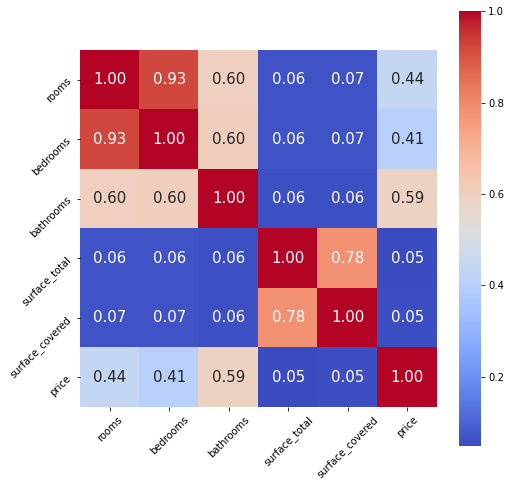

In [60]:
corr = properati_fil.drop(columns = "property_type" ).corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= properati_fil.drop(columns = "property_type" ).columns, 
           yticklabels= properati_fil.drop(columns = "property_type" ).columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

En el grafico de correlacion se puede apreciar que existe correlacion entre el precio con la cantidad de baños y ambientes que tenga la propiedad. Tambien se podria trabajar con las habitaciones que tenga la propiedad ya que existe una correlacion con el precio.

#### ¿Cuál es el barrio más caro de Buenos Aires? ¿y loa 5 barrios mas caros?

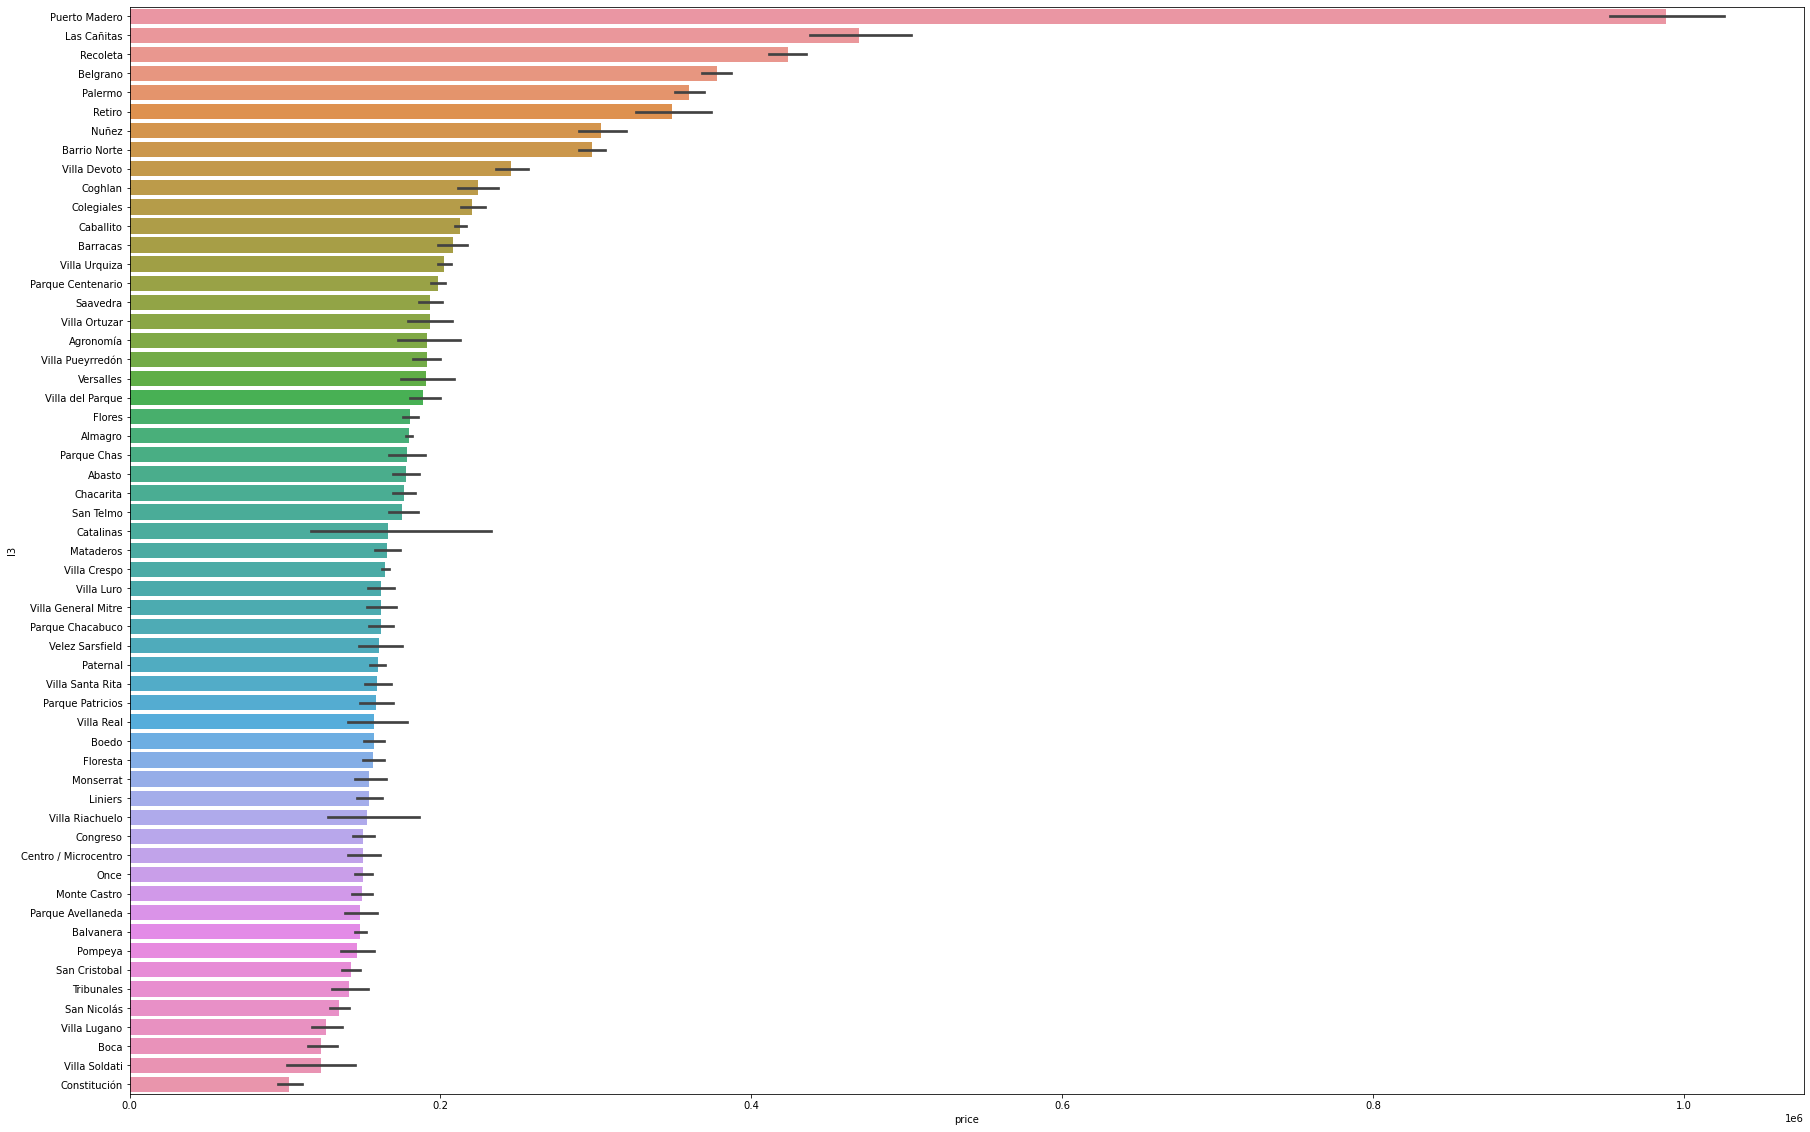

In [61]:
plt.figure(figsize = (30,20))
barrios = df_prop.groupby('l3').mean().sort_values('price', ascending=False).index
sns.barplot(x="price", y="l3", order=barrios, data=df_prop);

El barrio con las propiedades mas caras de Capital Federal es Puerto Madero, le siguen Las cañitas, Recoleta, Belgrano y Palermo. Se puede pensar que estas propiedades estan a la venta de forma online, aunque quizas las propiedades de los barrios mas baratos puedan estar a la venta por dueño directo o por inmobiliaria sin estar ublicada de forma online.

#### Machine Learning: mineria de datos 

importante: para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.

Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.

Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.

S1elecciona las columnas rooms, bedrooms, bathrooms, surface_total, surface_covered y price.

Descarta aquellas instacias con valores faltantes.

In [62]:
#Carga del dataset
mach_prop = pd.read_csv("C:/Users/gabri/OneDrive/Documentos/Data-science/DS_Proyecto_01_Datos_Properati.csv")

In [63]:
#Selecciono aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
data_type = mach_prop[mach_prop["property_type"].isin(["Departamento","Casa","PH"])]
data_ubic = data_type[data_type["l2"] == "Capital Federal"]


In [64]:
#Selecciono aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
data_sup =data_ubic.drop(data_ubic[(data_ubic["surface_total"] > 1000 )].index)
data_min = data_sup.drop(data_sup[(data_sup["surface_total"] < 15)].index)


In [65]:
#Selecciono aquellas propiedades cuya precio es menor 4000000 dólares.
data_price = data_min.drop(data_min[(data_min["price"] > 4000000 )].index)

In [66]:
#Selecciono las columnas rooms, bedrooms, bathrooms, surface_total, surface_covered y price.
col = data_price.drop(columns = ["start_date","end_date","created_on","lat","lon","l1","l2","l3","currency","title","description","operation_type"])
col

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...
146554,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,3.0,2.0,2.0,144.0,134.0,480000.0,PH
146556,4.0,2.0,2.0,317.0,143.0,530000.0,PH
146557,3.0,2.0,2.0,145.0,145.0,420000.0,Departamento


Luego de realizar el filtrado de acuerdo a los valores pedidos por cada variable, obtuvimos un dataset de 91289 filas y 7 columnas.

### Existen valores faltantes en el dataset?

In [67]:
col.isnull().sum()

rooms                 0
bedrooms              0
bathrooms          2167
surface_total      8916
surface_covered    9234
price                 0
property_type         0
dtype: int64

Puedo confirmar la existencia de valores faltantes en bathrooms, surface_total y surface_covered. Si bien surface_total y surface_covered son las variables con mas datos faltantes, eliminar esos datos no  van a impedir seguir trabajando correctamente con un dataset sin las filas  donde existan valores faltantes.

#### Eliminamos valores faltantes.

In [68]:
chek = col.dropna()
chek.isnull().sum()

rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

In [69]:
# Datos basicos estadisticos.
chek.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,81019.000000,81019.000000,81019.000000,81019.000000,81019.000000,8.101900e+04
mean,3.009652,2.002037,1.553821,95.361779,84.928535,2.637725e+05
std,1.308602,1.049673,0.852672,77.253578,156.133119,2.989499e+05
min,1.000000,0.000000,1.000000,15.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.250000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.800000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.800000e+05
max,26.000000,15.000000,14.000000,1000.000000,17220.000000,4.000000e+06


#### Conclusion:

Se puede observar que todas las columnas no tienen valores faltantees y que en total tienen cada una 81019 filas con valores. Otra de las cosas relevantes, es que el desvio en price, surface_total y en surface_covered es mayor que la media,  por lo tanto podemos sospechar la existencia de valores atipicos.

### Imprimimos las primeras 5 filas del dataset.

In [70]:
chek.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,2.0,1.0,1.0,56.0,56.0,150000.0,PH


#### Con cuantas filas vamos a estar trabajando?

In [71]:
chek.shape

(81019, 7)

#### Respuesta al checkpoint:

Deberías obtener un dataset con 81019 instacias y 6 columnas. Hay 7 columnas, debido a que deje la columna que me describe el tipo de propiedad (property_type)

### Hay valores atipicos?

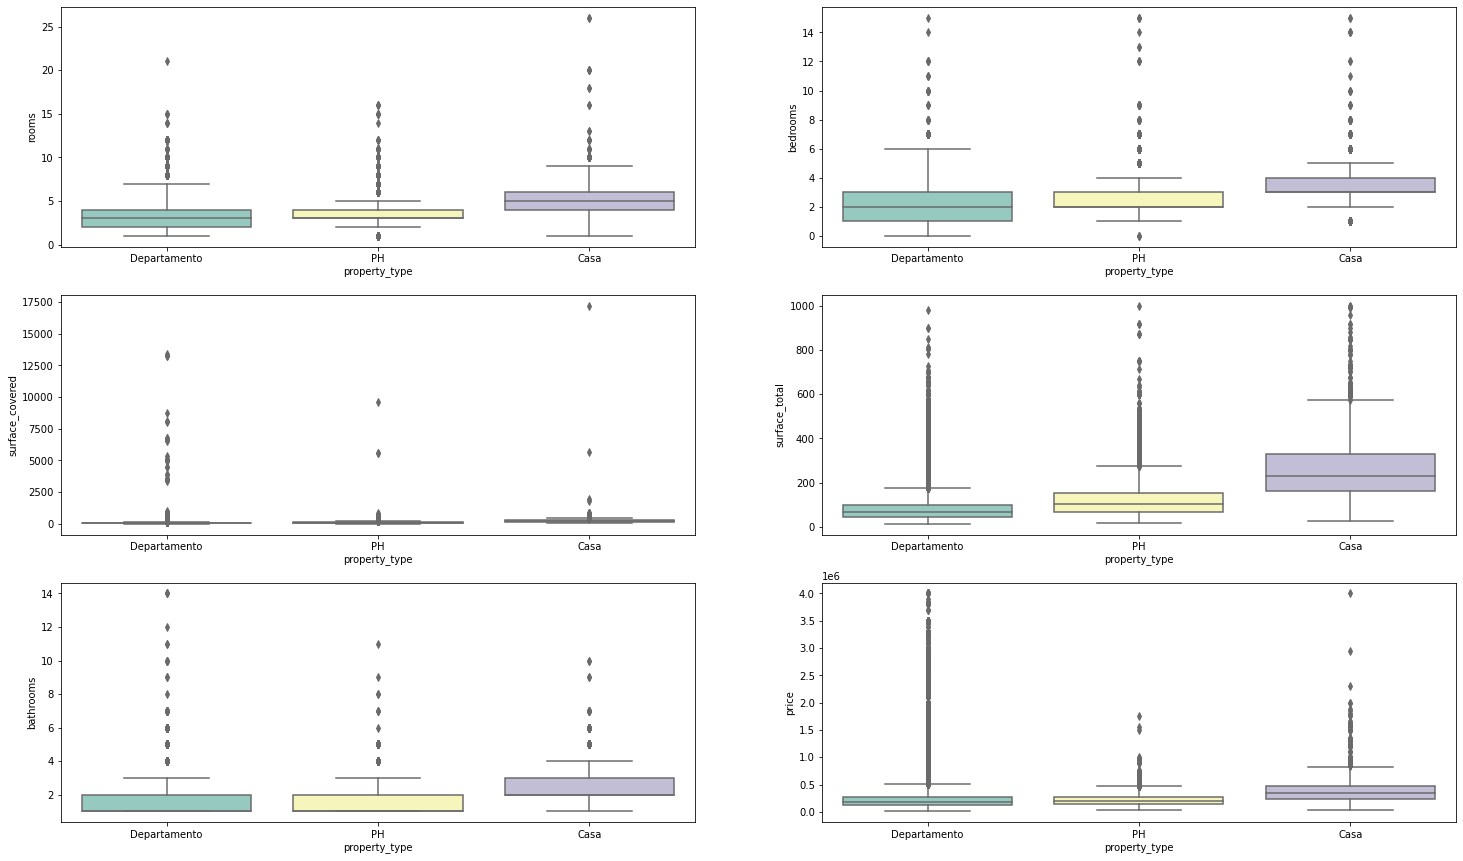

In [72]:
fig, axs = plt.subplots(nrows=3,ncols=2,figsize=(25,15))
sns.boxplot(x="property_type", y="rooms",data = chek, palette="Set3", ax=axs[0][0])
sns.boxplot(x="property_type", y="bedrooms",data = chek, palette="Set3", ax=axs[0][1])
sns.boxplot(x="property_type", y="surface_covered",data = chek, palette="Set3", ax=axs[1][0])
sns.boxplot(x="property_type", y="surface_total",data = chek, palette="Set3", ax=axs[1][1])
sns.boxplot(x="property_type", y="bathrooms",data = chek, palette="Set3", ax=axs[2][0])
sns.boxplot(x="property_type", y="price",data = chek, palette="Set3", ax=axs[2][1])

#### Conclusion: 
Si bien existen atipicos en cada uno de los graficos, la mayor cantidad de atipicos se observan en price, surface_total, surface_covered.

### Que variables se relacionan con el precio? 

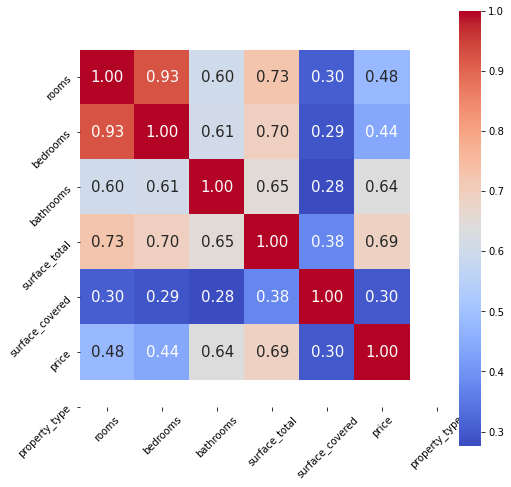

In [73]:
# Heatmap.
corr =chek.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= chek.columns, 
           yticklabels= chek.columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

#### Hipotesis: 
Segun lo que se puede visualizar en el grafico, seria apropiado tener en cuenta a la hora de predecir el precio de las propiedades la superficie total que tengan, la cantidad de baños y la cantidad de ambientes que cuente la propiedad. Es razonable tener en cuenta esto, sobre todo la cantidad de baños, ya que es un ambiente humedo de la casa y las instalaciones o comodidades que tenga va a repercutir sobre el precio.

#### .

### Machine Learning

Debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión - para predecir el precio de las propiedades tipo Departamento, PH y Casa en la Ciudad Autónoma de Buenos Aires (Capital Federal). Para ello, no debes olvidarte de:

Elegir una métrica apropiada para evaluar los resultados de los modelos.
Seleccionar las variables predictoras (X) y la variable a predecir (y).
Realizar un Train/Test split de los datos.
Generar un modelo benchmark y evaluarlo.
Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué?
Ser crítico/a con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

#### De acuerdo a lo observado en el grafico de correlacion, las variables que se eligiran para predecir el precio son surface_total,bathrooms y rooms.

In [74]:
# creamos las variables para nuestro trabajo
modelo = chek[["surface_total","bathrooms","rooms","price"]]
X = np.array(modelo.drop(["price"],1)) 
y = np.array(modelo["price"])

#### Elegir una métrica apropiada para evaluar los resultados de los modelos.
Se llevara a cabo el modelo con la metrica de evaluacion RMSE(Root mean squared error) ya que estamos trabajando sobre un problema de regresion. Tambien porque convierte unidades nuevas a unidades originales de la variable de salida y porque es sensible a valores atipicos.


-En ambos modelos se realizara una búsqueda en cuadrícula o Grid Search.

In [75]:
# Librerias que seran utiles.
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [76]:
# se realiza la particio de los datos (train-test-split) y se especifica la semilla. La particion sera de 20% para test y 80% para train.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1905)
print( "Son {} datos para entrenamiento y {} datos para prueba".format(X_train.shape[0], X_test.shape[0]))

Son 64815 datos para entrenamiento y 16204 datos para prueba


#### Modelo Benchmark.

In [95]:
# Se realizará un modelo de regresión lineal
from sklearn.linear_model import LinearRegression
import math

In [96]:
lr_model  =  LinearRegression ()
lr_model . fit ( X_train , y_train )

LinearRegression()

In [97]:
print('Training score: {}'.format(lr_model.score(X_train, y_train)))
print('Test score: {}'.format(lr_model.score(X_test, y_test)))


Training score: 0.5432189031513239
Test score: 0.543160068142245


In [98]:
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

RMSE: 198197.30049508341


El modelo anterior nos da una precisión de entrenamiento y una precisión de prueba de aproximadamente del 54%. También obtenemos un RMSE de aproximadamente 198197.300. Los próximos modelos que entrenemos deberían superar a este modelo con puntuaciones de precisión más altas y un RMSE más bajo.

### Modelo:  DecisionTreeRegressor

In [90]:
# Vamos a escoger el modelo de regresion DecisionTreeRegressor.
tree = DecisionTreeRegressor()

Se ralizara una búsqueda aleatoria de hiperparámetros con la funcion GridSearch para tener un modelo base que nos sirva de referencia para comparar posteriores mejoras.

In [34]:
# Grilla para Random Search
param_grid =  {"max_depth":[2,3,4,5],
                "min_samples_split":[2,3,4],
                "min_samples_leaf":[0.1,0.2,0.3],
                "criterion": ["mse", "mae"]}

In [92]:
# ESTRATEGIA 2: Random Search
model_1 = GridSearchCV(tree, param_grid, cv = 3)
#n_iter = 30)

# Entrenamos: tree con la grilla definida arriba y CV con tamaño de Fold=5
model_1.fit(X_train, y_train)
# hemos validado correctamente cada modelo con su correspondiente configuración de hiperparámetros.

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [0.1, 0.2, 0.3],
                         'min_samples_split': [2, 3, 4]})

In [93]:
# Mejores parametros y mejor score que nos proporciona Random Serch
print("Mejores parametros: "+str(model_1.best_params_))
print("Mejor Score: "+str(model_1.best_score_)+'\n')

Mejores parametros: {'criterion': 'mse', 'max_depth': 4, 'min_samples_leaf': 0.1, 'min_samples_split': 2}
Mejor Score: 0.41806017309630866



### DecisionTreeRegressor:
A continuacion se realizara un modelo simple y las curvas de error con la variacion de hiperparametros para train y test.

In [98]:
# Definimos las listas vacias para los valores de mse deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de profundidad que vamos a explorar
max_depths = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,35]

# Generamos un loop sobre los distintos valores de max_depths
for max_depth in max_depths:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de tree_regressor
    tree_regressor = DecisionTreeRegressor(max_depth=max_depth,random_state=1905)
    
    # Entrenar el modelo
    tree_regressor.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = tree_regressor.predict(X_train)   
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred ))

    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = tree_regressor.predict(X_test)  
    rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
    
    # Agregar la información a las listas
    lista_accuracy_train.append(rmse_train)
    lista_accuracy_test.append(rmse_test)

Text(0, 0.5, 'RMSE')

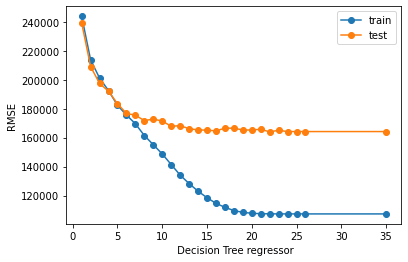

In [99]:
# Graficamos la curva.
plt.plot(max_depths, lista_accuracy_train, "o-",label = "train" )
plt.plot(max_depths, lista_accuracy_test, "o-",label = "test" )
plt.legend()
plt.xlabel(" Decision Tree regressor")
plt.ylabel("RMSE")

El menor RMSE, considerando que no haya OverFitting se obtiene en maxdepth = 11

In [100]:
# Medimos la puntuacion de los datos de prueba.
tree_regressor.score(X_test,y_test) 

0.6864081819412693

In [101]:
# Medimos la puntuacion de los datos de entrenamiento.
tree_regressor.score(X_train,y_train) 

0.8724331238157681

El resultado obtenido del modelo decision tree, nos indica que si bien el score de train es una aceptable puntuacion, la diferencia que nos da con el score de test puede darnos un indicio de overfitting. Seria apropiado trabajar con Knn para compararlos y ajustar los hiperparametros para mejorar el modelo.

#### Preguntas:

-El modelo Knn brindara mejores resultados?

-Que parametros se tendran en cuenta para GridSearch?

Existe la posibilidad de comparar ambos modelos y asi poder observar los resultados que arroja la metrica anteriormente seleccionada para abordar este problema?

### Modelo:  KNN

In [103]:
# vamos a escoger el modelo de regresion, con KNeighborsRegressor
knn = KNeighborsRegressor() 

### Random Search

In [104]:
# Grilla para Random Search
param_grid2 = {'n_neighbors':np.arange(1, 20),
              'weights': ['uniform', 'distance'], 
              'leaf_size':[1,3,5,7,10],
              'algorithm':['auto', 'kd_tree']}

In [109]:
# ESTRATEGIA 2: Random Search
model = GridSearchCV(knn, param_grid2, cv=5) 

# Entrenamos: KNN con la grilla definida arriba y CV con tamaño de Fold=5
model.fit(X_train, y_train)
# hemos validado correctamente cada modelo con su correspondiente configuración de hiperparámetros.

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'leaf_size': [1, 3, 5, 7, 10],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']})

In [110]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 16, 'weights': 'distance'}
Mejor Score: 0.7358098733100377



### KNeighborsRegressor: 
Modelo simple y las curvas de error con la variacion de hiperparametros para train y test.

In [111]:
# Definimos las listas vacias para los valores mse deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]

# Generamos un loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    neigh = KNeighborsRegressor(n_neighbors=k)
    
    # Entrenar el modelo
    neigh.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = neigh.predict(X_train)   
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = neigh.predict(X_test)  
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_accuracy_train.append(rmse_train)
    lista_accuracy_test.append(rmse_test)

Text(0, 0.5, 'Rmse')

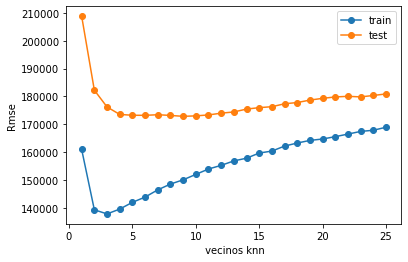

In [112]:
# Graficamos la curva.
plt.plot(k_vecinos, lista_accuracy_train, "o-",label = "train" )
plt.plot(k_vecinos, lista_accuracy_test, "o-",label = "test" )
plt.legend()
plt.xlabel(" vecinos knn")
plt.ylabel("Rmse")

Una optima cantidad de vecinos puede ser 10 ya que en ese punto es donde Fitting se comienza a aplanar, es decir deja de haber OverFitting y es el punto donde no hay OverFitting con menor error

In [113]:
# Medimos la puntuacion de los datos de prueba.
neigh.score(X_test,y_test) 

0.6194310743947871

In [114]:
# Medimos la puntuacion de los datos de entrenamiento.
neigh.score(X_train,y_train) 

0.6835716080627218

El resultado obtenido no es muy favorable. Si bien la puntuacion de entrenamiento es mejor que la de prueba, eso no quiere decir que el modelo sea el optimo para abordar la problematica. Tambien teniendo en cuenta que decision tree nos arrojo un mejor resultado de train pero con posibilidades de overfitting.

### Comparacion de ambos modelos ulizando RMSE

Modelo: Decision Tree Classifier
Raíz del error cuadrático medio en Train: 107277.81017423685
Raíz del error cuadrático medio en Test: 164209.42010385604


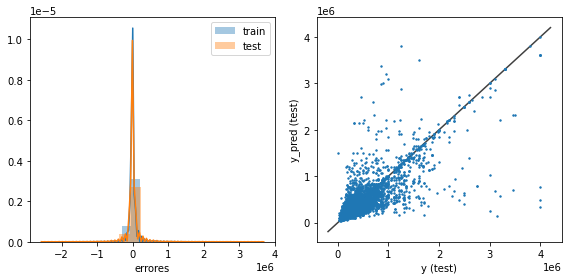

Modelo: Vecinos knn
Raíz del error cuadrático medio en Train: 168957.96167939354
Raíz del error cuadrático medio en Test: 180897.417968548


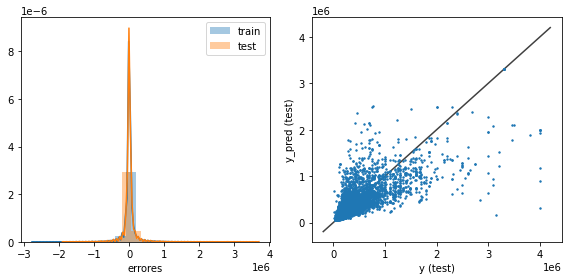

In [115]:
# Nombramos cada uno de los graficos con el modelo que represntara
modelos = [ "Decision Tree Classifier","Vecinos knn"]

# Generamos un loop sobre las predicciones de ambos modelos.
for i, model in enumerate([tree_regressor,neigh]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    # Raíz del error cuadrático medio para train y test.
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    #graficamos ambos modelos comparando los errores.
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()
    

#### Conclusion:
En ambos casos test es mayor que train, se puede confirmar que la particion de train test split es correcta.

Analizando los errores de ambos modelos, el modelo decision tree nos arroja menos errores que el modelo Knn, pero es un modelo mas ajustado que el de Knn. Seria conveniente realizar un ajuste de hiperparametros para llegar a una mejor conclusion y poder comparar ambos modelos mejor.

## Mejorando ambos modelos.

Metricas y puntuacion.

In [99]:
# A el modelo Knn se le asiganra una cantidad de 10 vecinos y al modelo Decision Tree una profundidad MaxDepth = 18
model_knn = KNeighborsRegressor(n_neighbors=10)
model_tree = DecisionTreeRegressor(max_depth=11, random_state=1905)

In [100]:
# Entrenar el modelo Knn
model_knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [101]:
# Entrenar el modelo Decision Tree.
model_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=11, random_state=1905)

#### Knn:  
Medimos la puntuacion de los datos de prueba y de entrenamiento.

In [102]:
model_knn.score(X_train,y_train) 

0.7437922955495262

In [108]:
# Medimos la puntuacion de los datos de prueba.
model_knn.score(X_test,y_test) 

0.6518206667086286

In [109]:
y_pred = model_knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

RMSE: 173028.32379949893


#### Arbol de desicion:  
Medimos la puntuacion de los datos de prueba y de entrenamiento.

In [104]:
model_tree.score(X_train,y_train) 

0.7783224794753416

In [106]:
model_tree.score(X_test,y_test) 

0.6723153606677401

In [107]:
y_pred = model_tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

RMSE: 167858.65842566793


#### Conclusion: 
Luego mejorar ambos modelos, el modelo Decision Tree nos sigue dando un mejor resultado que Knn, esto significa que hasta el modelo optimo es Decision Tree.

Comparamos ambos modelos mejorados y chequeamos la Raíz del error cuadrático medio a continuación.

#### ¿Que modelo elegiría y porqué?
De acuerdo a las conclusiones que se llego anteriormente en base a los resultados obtenidos para cada modelo, eligiria utilizar el modelo Decison Tree Regressor. La eleccion se daria porque la puntuacion obtenida es satisfactoria y porque la raiz del error cuadratico es mas bajo comparandolo con Knn. Por las conclusiones ya dicha, pienso que es el modelo que mejor se adapta a la problematica planteada.
Seguramente aplicando herramientas de normalizacion, escalado o incluso porbando otros modelos, se pueden llegar a obtener mejores resultado
La optimizacion de los hiperparametros decidio hacerse a mano, en base a los resultados obtenidos en el grafico de la curva de error.

#### ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

-Pienso que la informacion que podria ayudar al modelo es utilizar la superficie cubierta de las propiedades, no fue utilizada ya que en el grafico de correlacion no tenia una fuerte relacion con el precio.

-Estudiaria la oferta por barrio.

-Trabajaria sobre los valores atipicos, si bien no fue pedido en la ultima parte del proyecto, entiendo que trabajarlos mejoraria nuestro modelo.

-Estudiaria las fechas que fueron publicadas las propiedades, ya que el mercado argentino es muy dinamico y pienso que seria necesario trabajar con un parametro establecido de fechas.

In [ ]:
# Representamos el ajuste (rojo) y la recta Y = beta*x (verde)
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
x_real = np.array([0, 100])
y_real = x_real*beta
plt.plot(x_real, y_real, color='green')
plt.show()
